In [29]:
# dff_flat_list contains np flattened arrays for 0: all trials, 1: hit trials, and 2: miss trials
#dff_concat = np.hstack((dff_flat_list[0], dff_flat_list[2]))
dff_concat = np.array(dff_flat_list[0])
dff_hit_concat = np.array(dff_flat_list[1])
dff_miss_concat = np.array(dff_flat_list[2])

In [30]:
z_data_flat = stats.zscore(dff_concat,axis=1)
z_data_hit = stats.zscore(dff_hit_concat,axis=1)
z_data_miss = stats.zscore(dff_miss_concat,axis=1)

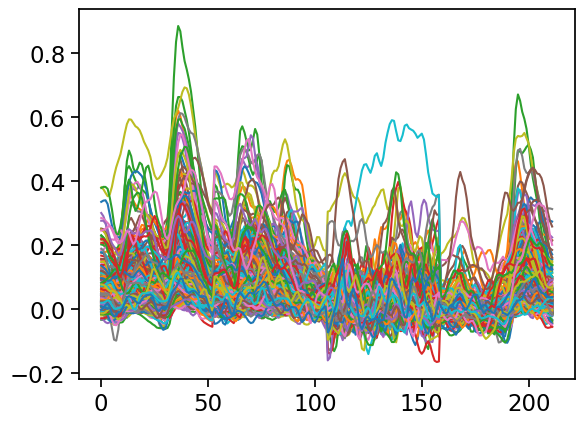

In [31]:
plt.plot(dff_concat.T);

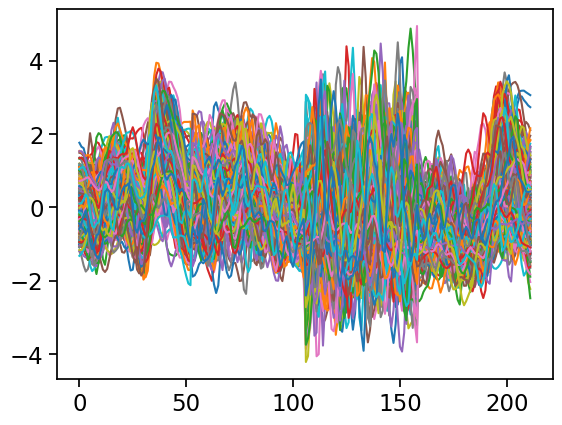

In [32]:
plt.plot(z_data_flat.T);

# Silhouette Score

In [33]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score


## assign which data to cluster

In [34]:
# data to cluster should be in a format of n types x n features 
#(for ophys, types=cells, features=concatenated time series in nn-nf-ff-fn order)
data_to_cluster = z_data_flat

For n_clusters = 2 The average silhouette_score is : 0.10234456887537409
For n_clusters = 3 The average silhouette_score is : 0.09477972147331849
For n_clusters = 4 The average silhouette_score is : 0.06628986233025537
For n_clusters = 5 The average silhouette_score is : 0.061871710459433175
For n_clusters = 6 The average silhouette_score is : 0.058069336870177055
For n_clusters = 7 The average silhouette_score is : 0.045063451224001606
For n_clusters = 8 The average silhouette_score is : 0.04999069648593577
For n_clusters = 9 The average silhouette_score is : 0.05209412767497034
For n_clusters = 10 The average silhouette_score is : 0.04710234034532313
For n_clusters = 11 The average silhouette_score is : 0.04156940198729267


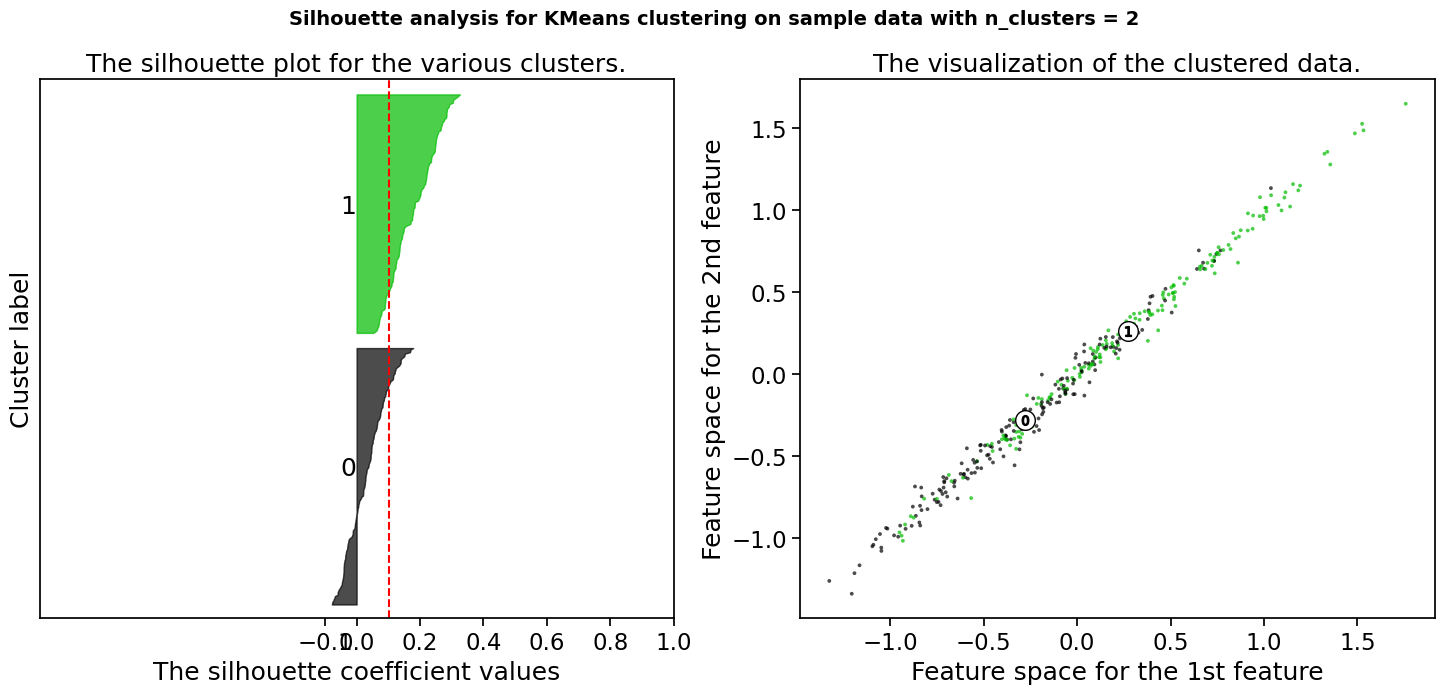

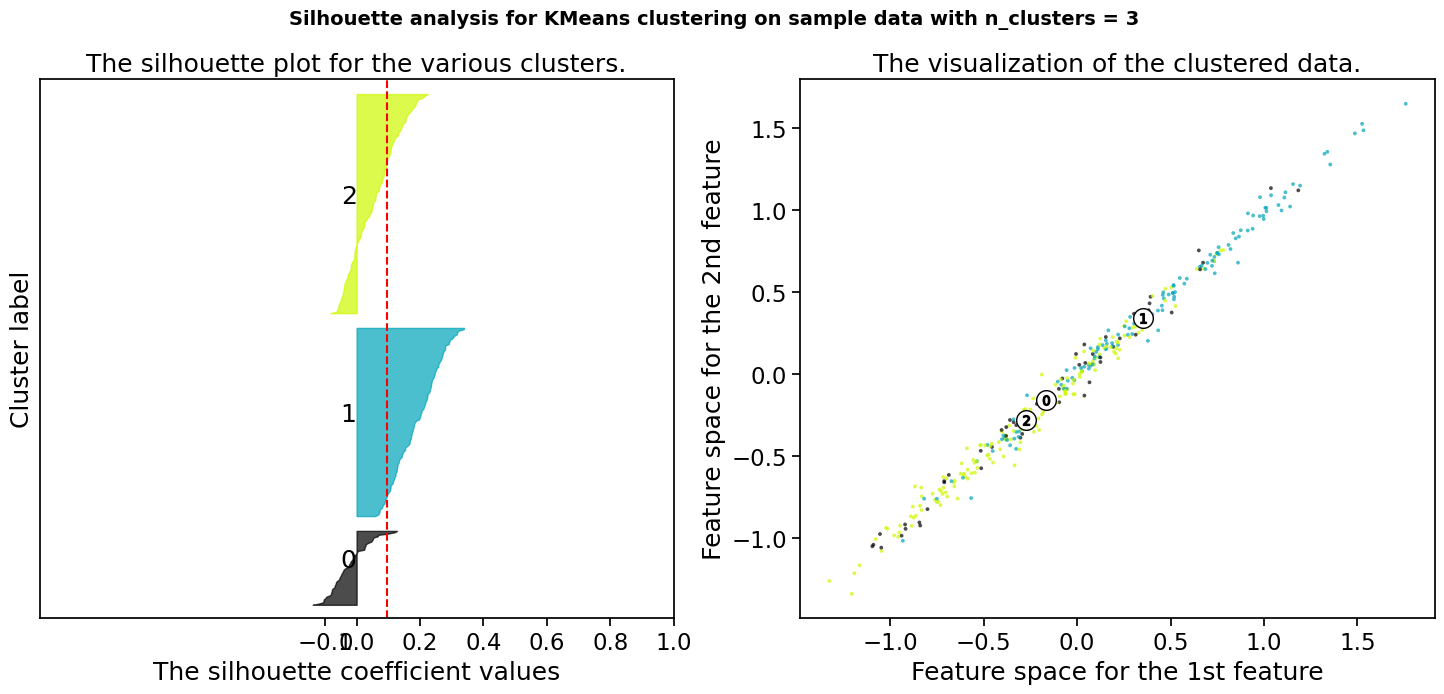

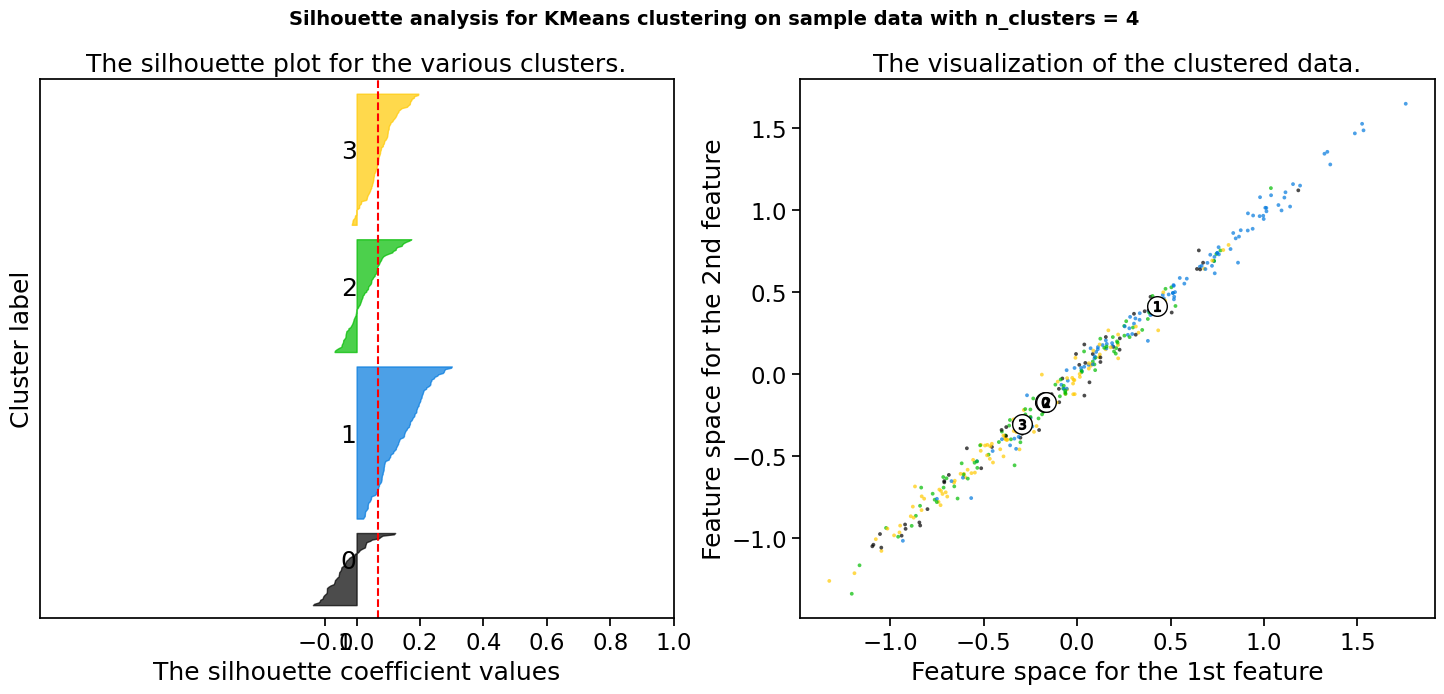

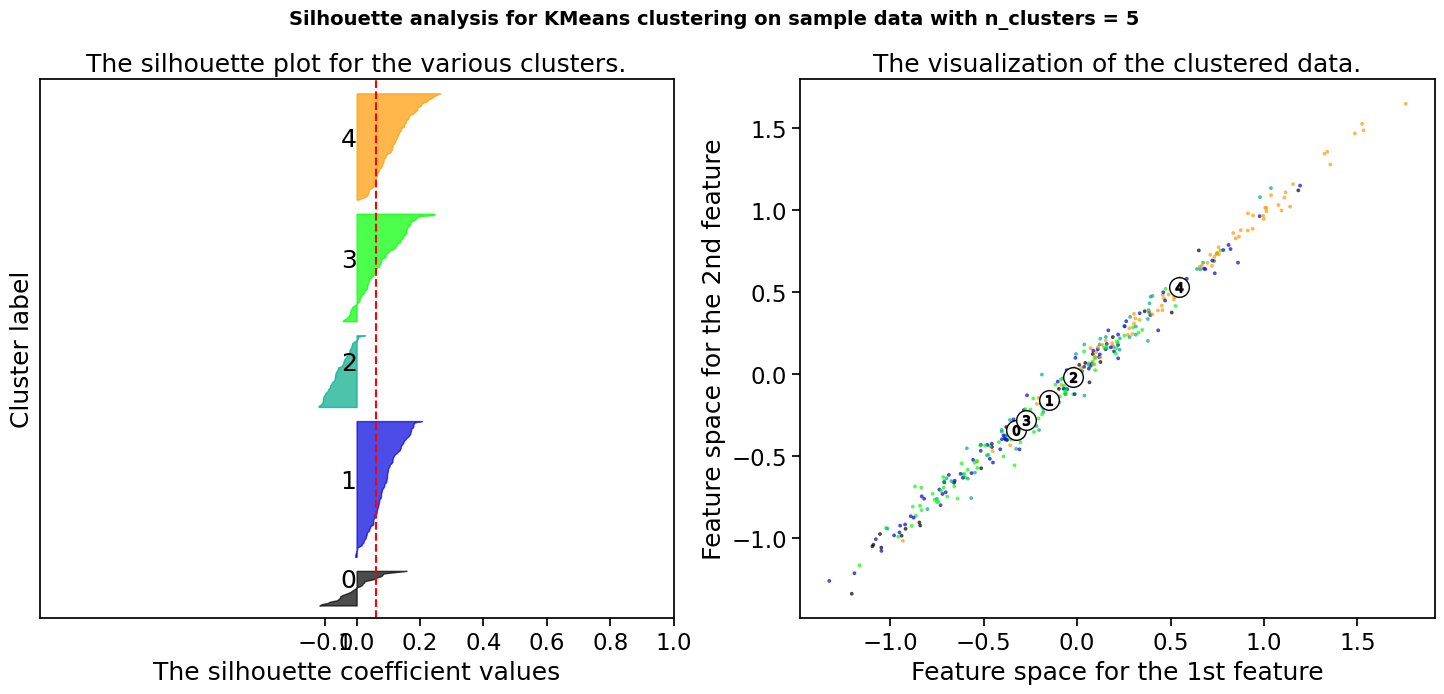

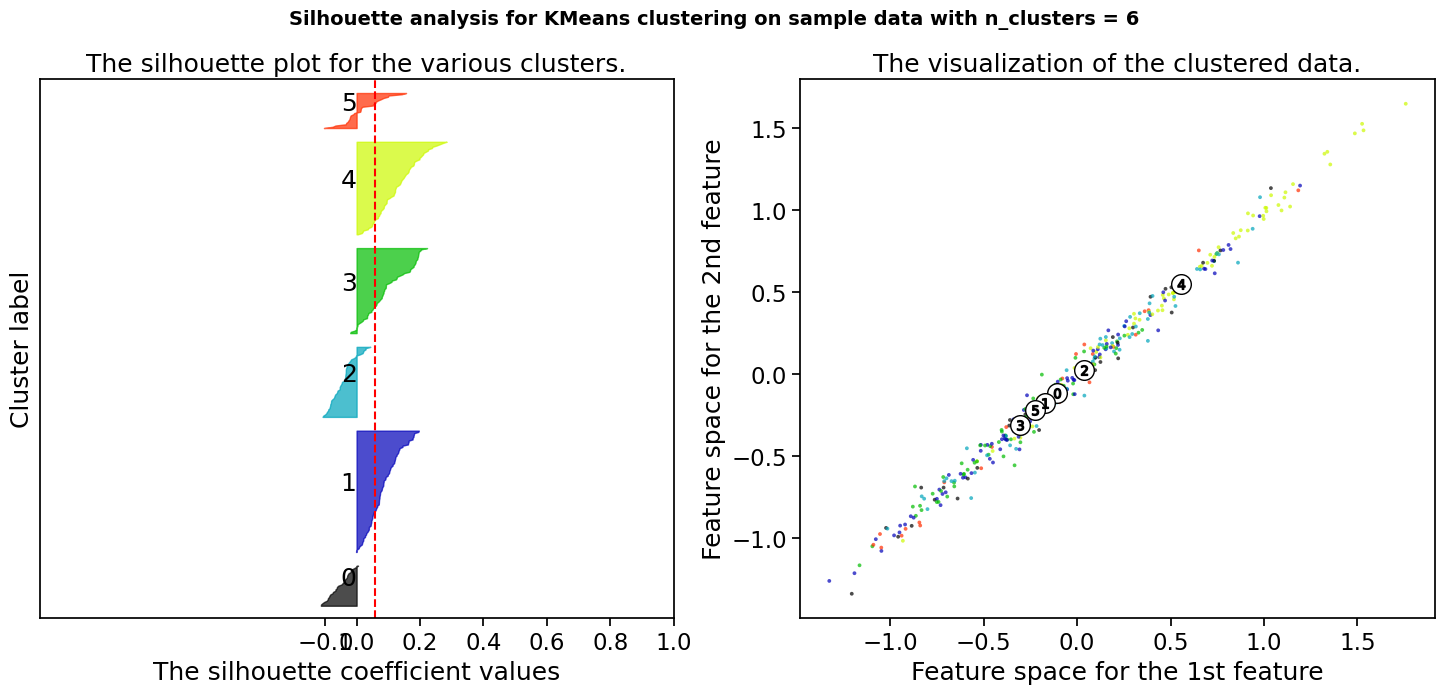

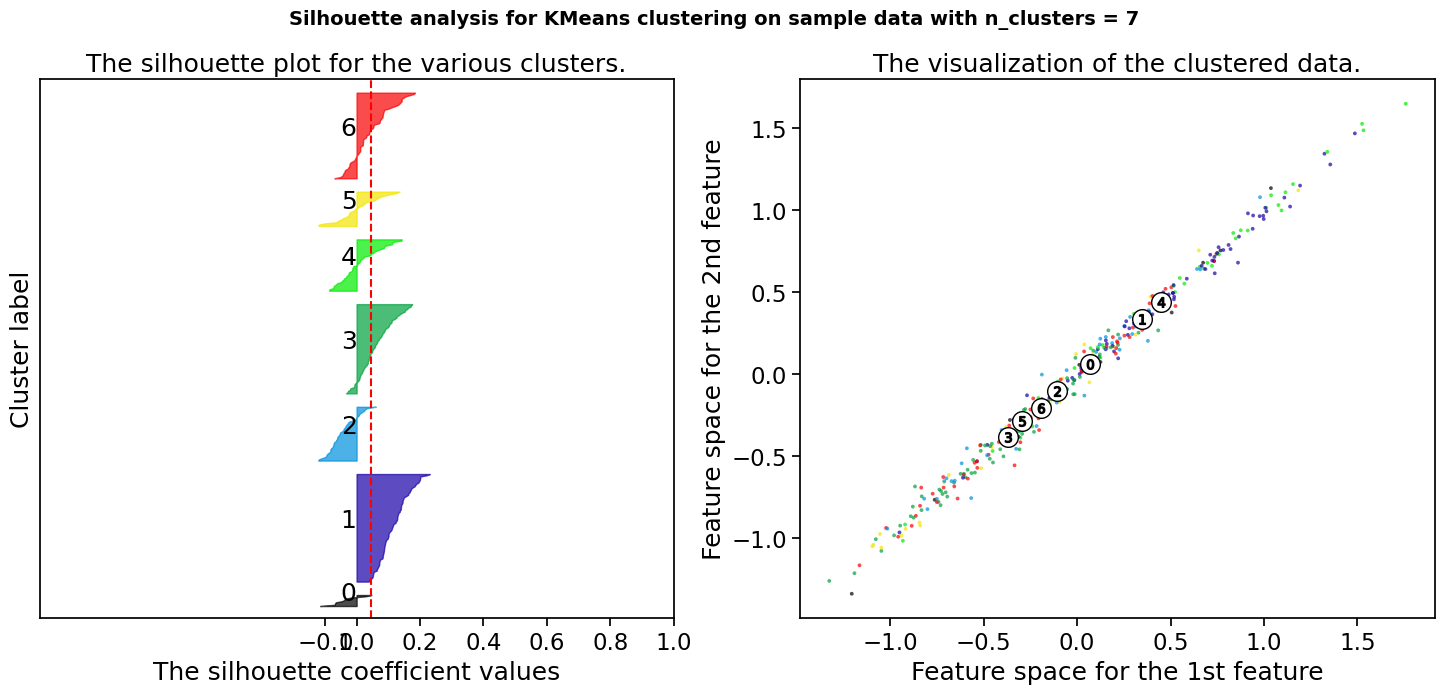

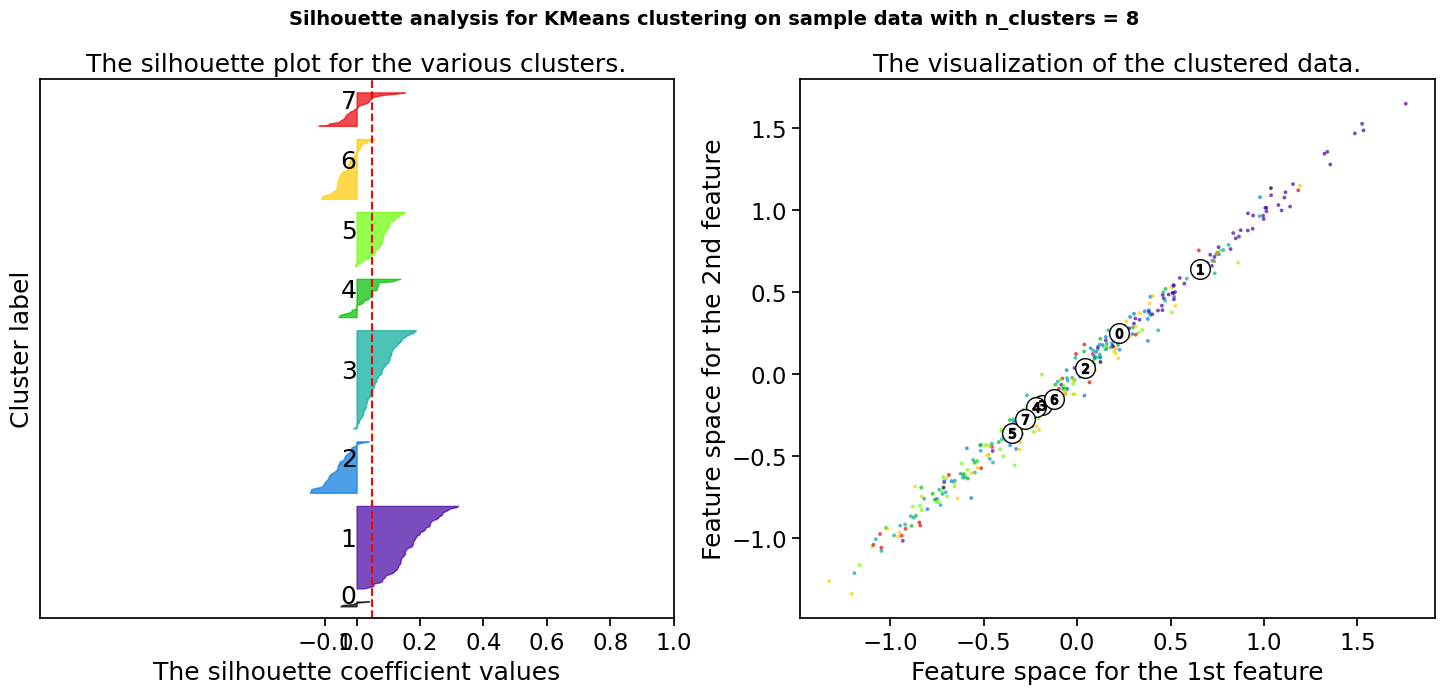

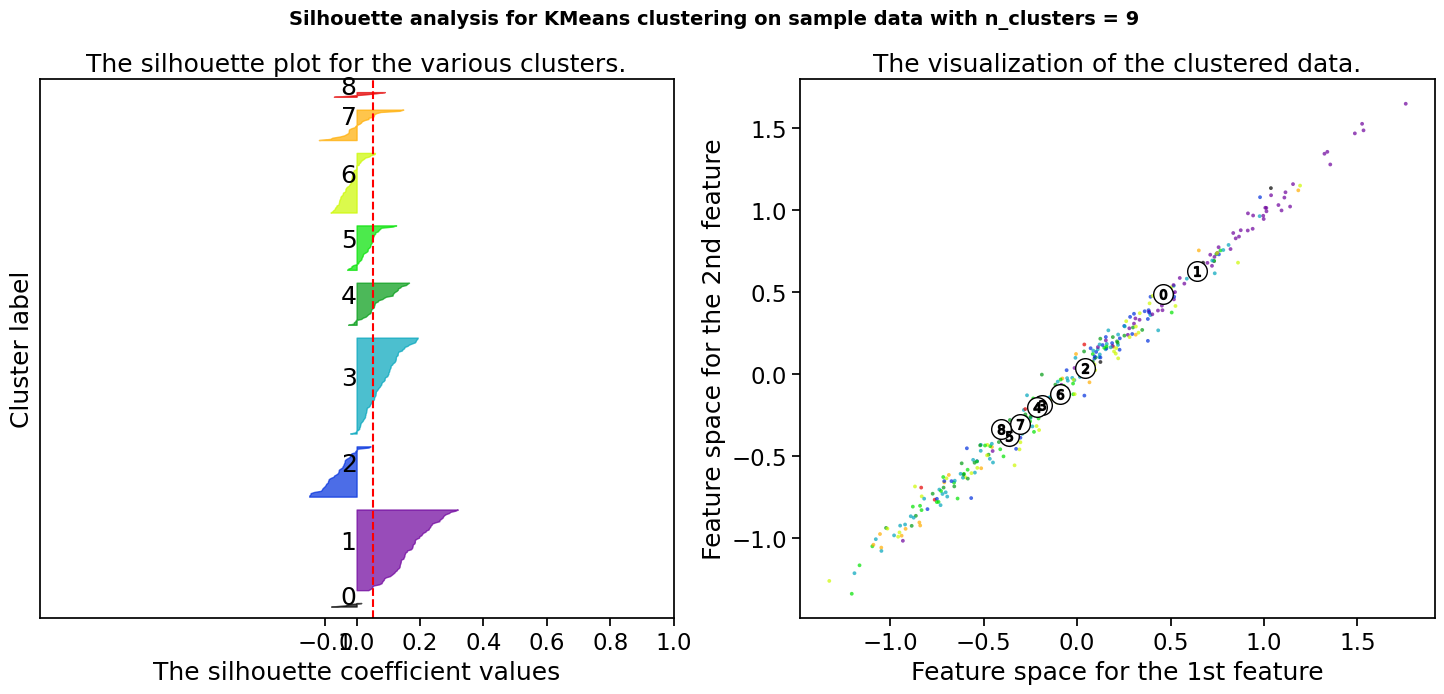

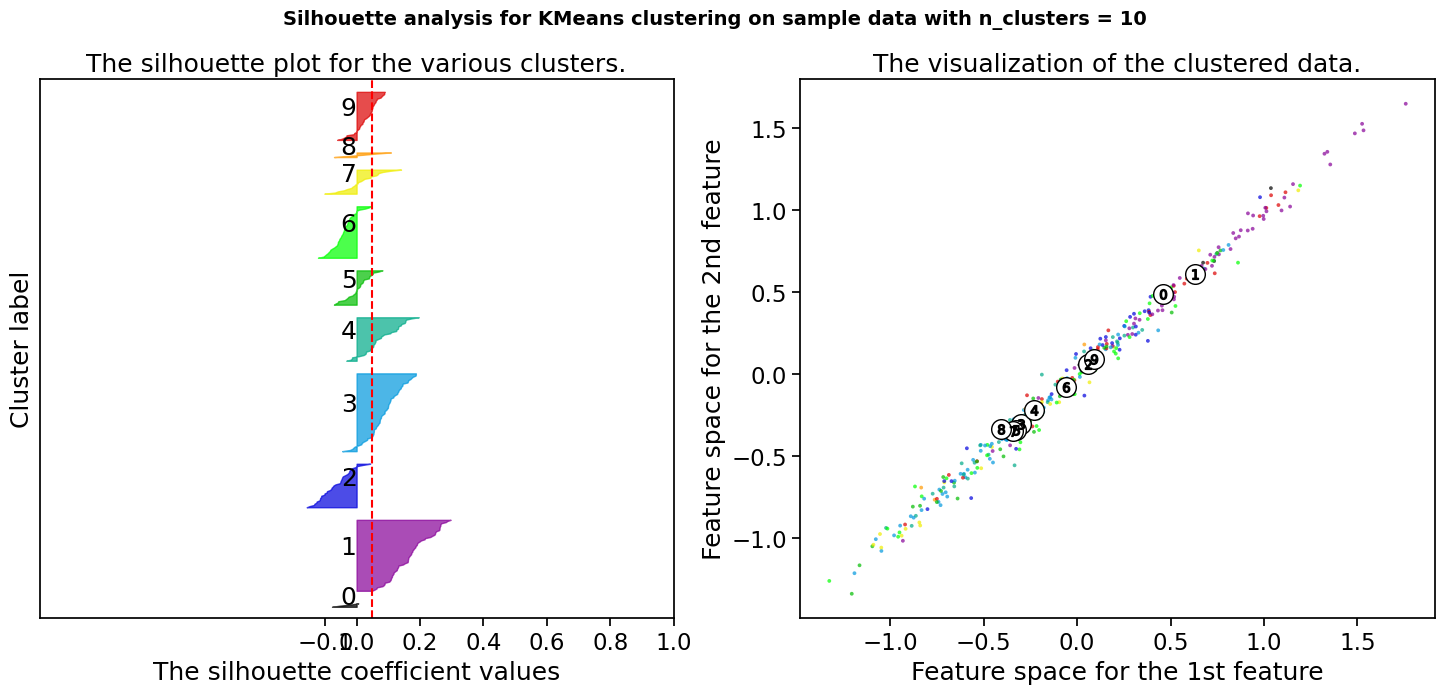

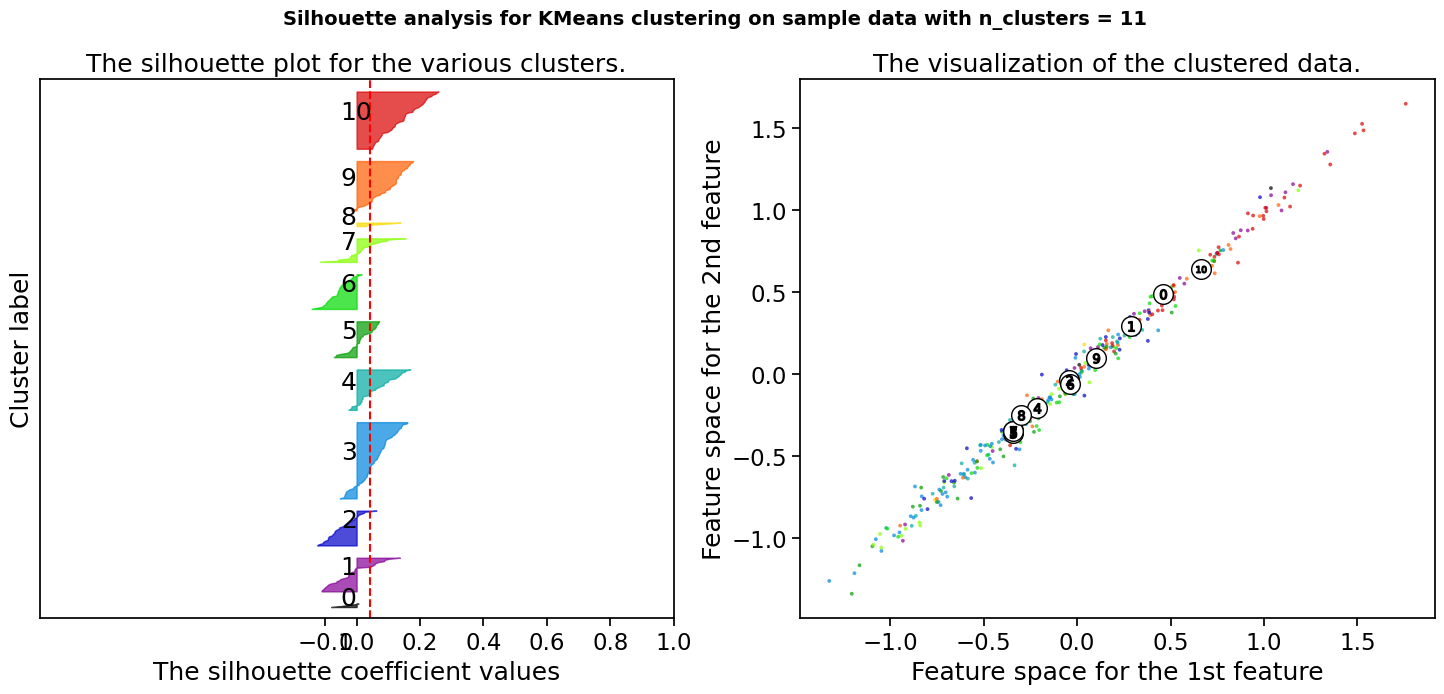

In [35]:


# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
# X, y = make_blobs(
#     n_samples=500,
#     n_features=2,
#     centers=4,
#     cluster_std=1,
#     center_box=(-10.0, 10.0),
#     shuffle=True,
#     random_state=1,
# )  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
silhouette_list = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_to_cluster) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_to_cluster)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_to_cluster, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    silhouette_list.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_to_cluster, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data_to_cluster[:, 0], data_to_cluster[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Text(0, 0.5, 'Silhouette score')

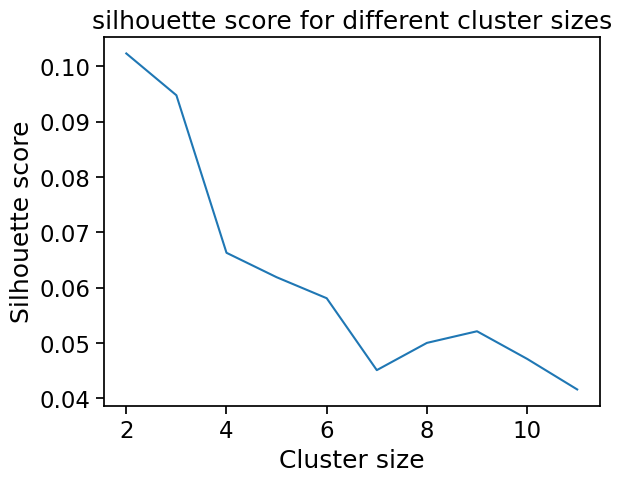

In [36]:
# plot silhouette scores:
#sil_scores = [0.05678667949056855, 0.0503501752731177, 0.04842927896017404, 0.04119648460883629, 0.03887885728616518, 0.04372803573890765, 0.040548893560572445]
clus_num = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

plt.plot(clus_num, silhouette_list)
plt.title("silhouette score for different cluster sizes")
plt.xlabel("Cluster size")
plt.ylabel("Silhouette score")

# K Means Clustering WITH PCA

In [37]:
# Assign the number of clusters
num_clusters = 6

In [38]:
import random


pca = PCA(2)

#Transform the data
df_kmeans = pca.fit_transform(data_to_cluster)
 
df_kmeans.shape

(361, 2)

In [39]:


kmeans = KMeans(n_clusters= num_clusters, random_state = 50)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df_kmeans)
 


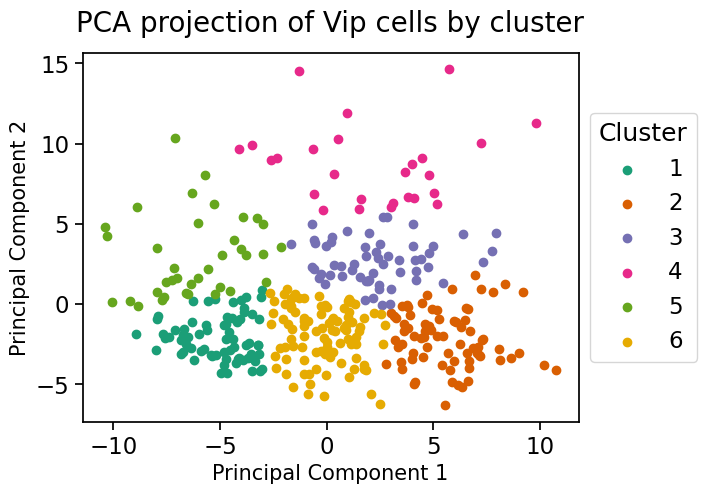

In [40]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
hues = sns.color_palette("Dark2")
 
for i in u_labels:
    plt.scatter(df_kmeans[label == i , 0] , df_kmeans[label == i , 1] , label = i+1, color = hues[i])
plt.legend(title='Cluster', loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('PCA projection of Vip cells by cluster', fontsize = 20, pad = 15)


plt.savefig(genotype_image_path+'PCA_by_clusters', format = "svg")
plt.show()

In [41]:
#kmeans = KMeans(n_clusters=num_clusters).fit(data_to_cluster)


In [42]:
# for cell_specimen_id in stim_response_stack_nn.cell_specimen_id.unique()

# Get the unique cell_specimen_ids
unique_cell_ids = stim_response_stack_nn.cell_specimen_id.unique()

# Initialize an empty list to store the targeted_structure_id values
structure_ids = []

cell_id_list_2 = []

# Loop through each unique cell_specimen_id
for cell_specimen_id in unique_cell_ids:
    # Get the targeted_structure_id for the current cell_specimen_id
    # Assuming that each cell_specimen_id is associated with only one targeted_structure_id
    targeted_structure_id = stim_response_stack_nn.loc[stim_response_stack_nn.cell_specimen_id == cell_specimen_id, 'targeted_structure_id'].iloc[0]
    
    # Append the targeted_structure_id to the list
    structure_ids.append(targeted_structure_id)
    cell_id_list_2.append(cell_specimen_id)

# Convert the list to an ndarray
structure_ids_array = np.array(structure_ids)


In [43]:
cell_id_list == cell_id_list_2

True

## Convert back to data frame

In [44]:
# Convert each row of the array to a list
z_all_list = [list(row) for row in z_data_flat]

# Convert each row of the array to a list
z_hit_list = [list(row) for row in z_data_hit]

# Convert each row of the array to a list
z_miss_list = [list(row) for row in z_data_miss]

df_kmeans_list = [list(row) for row in df_kmeans]

In [45]:
clustered_df = pd.DataFrame(
{"targeted_structure_id" : structure_ids,
"cell_specimen_id" : cell_id_list, "df_kmeans" : df_kmeans_list, "z_all" : z_all_list, "z_hit" : z_hit_list, "z_miss" : z_miss_list})
clustered_df

targeted_structure_id  cell_specimen_id  \
0                        1        1120054836   
1                        1        1120054947   
2                        1        1120055050   
3                        1        1120055116   
4                        1        1120055188   
..                     ...               ...   
356                      2        1120133003   
357                      2        1120133014   
358                      2        1120133031   
359                      2        1120133064   
360                      2        1120133086   

                                      df_kmeans  \
0     [-0.7702030620458534, -4.954899081292985]   
1     [-3.682553019101857, -3.3731259478788935]   
2     [-1.0638791996623127, -3.507963468804864]   
3     [-0.8910092525237493, -1.051747123900962]   
4      [-4.936984050999329, -4.291518323514456]   
..                                          ...   
356   [-4.605661976880259, -1.7039854687725562]   
357  [-1.6541102565875045, -2.1656212222402424]   
358   [-0.5618345566232925, 3.8118689029981168]   
359    [-3.7884989818240884, 3.077019997352921]   
360     [2.873498927728835, 3.0140545412257924]   

                                                 z_all  \
0    [-0.3837923903781318, -0.37937746150750357, -0...   
1    [-0.3878624819719517, -0.3941102700324153, -0....   
2    [0.4339966950855461, 0.2659652317871037, -0.06...   
3    [-0.15506136578739066, -0.16062375770497622, -...   
4    [0.8210196179022248, 0.7619801125891507, 0.650...   
..                                                 ...   
356  [0.7125560132047133, 0.7273716429766948, 0.754...   
357  [0.46127937543751907, 0.49807286785949567, 0.4...   
358  [0.6583385571408311, 0.6377835141124235, 0.542...   
359  [0.09427890139659928, 0.10679796756559493, 0.2...   
360  [-0.5898429763411974, -0.4536914028319953, -0....   

                                                 z_hit  \
0    [-0.13441460898902063, -0.15551698339752873, -...   
1    [-0.27496957516446957, -0.2865277998969682, -0...   
2    [0.42568014526336667, 0.2659490236468876, -0.0...   
3    [-0.09124062439106975, -0.14086970084100525, -...   
4    [0.8527274989004356, 0.796629486316498, 0.6797...   
..                                                 ...   
356  [0.3621654100587246, 0.36141010392827316, 0.38...   
357  [0.02207188765600687, 0.07991225753623674, 0.1...   
358  [0.41867338141725957, 0.35339662754277157, 0.1...   
359  [-0.30820309851384453, -0.2691622163105047, -0...   
360  [-0.27723453019146743, -0.1839537676412023, -0...   

                                                z_miss  
0    [-1.0649519600644943, -0.9739377104782682, -0....  
1    [-0.6438130459944202, -0.6258487907158845, -0....  
2    [0.2618090162091398, 0.12939111341693907, -0.1...  
3    [-0.8442164390148058, -0.7181416019126152, -0....  
4    [0.1156709753421304, 0.06739920797969698, 0.03...  
..                                                 ...  
356  [1.1909525289497414, 1.2293426923970199, 1.250...  
357  [1.0559927365033241, 0.9988321107518062, 0.802...  
358  [0.884397215099534, 0.913868644705367, 0.89684...  
359  [0.5293183567381107, 0.603087321807436, 0.7910...  
360  [-0.6729087792348395, -0.6386593644079404, -0....  

[361 rows x 6 columns]

In [46]:
len(kmeans.labels_)

361

In [47]:
clustered_df['kmeans_labels'] = kmeans.labels_
clustered_df

targeted_structure_id  cell_specimen_id  \
0                        1        1120054836   
1                        1        1120054947   
2                        1        1120055050   
3                        1        1120055116   
4                        1        1120055188   
..                     ...               ...   
356                      2        1120133003   
357                      2        1120133014   
358                      2        1120133031   
359                      2        1120133064   
360                      2        1120133086   

                                      df_kmeans  \
0     [-0.7702030620458534, -4.954899081292985]   
1     [-3.682553019101857, -3.3731259478788935]   
2     [-1.0638791996623127, -3.507963468804864]   
3     [-0.8910092525237493, -1.051747123900962]   
4      [-4.936984050999329, -4.291518323514456]   
..                                          ...   
356   [-4.605661976880259, -1.7039854687725562]   
357  [-1.6541102565875045, -2.1656212222402424]   
358   [-0.5618345566232925, 3.8118689029981168]   
359    [-3.7884989818240884, 3.077019997352921]   
360     [2.873498927728835, 3.0140545412257924]   

                                                 z_all  \
0    [-0.3837923903781318, -0.37937746150750357, -0...   
1    [-0.3878624819719517, -0.3941102700324153, -0....   
2    [0.4339966950855461, 0.2659652317871037, -0.06...   
3    [-0.15506136578739066, -0.16062375770497622, -...   
4    [0.8210196179022248, 0.7619801125891507, 0.650...   
..                                                 ...   
356  [0.7125560132047133, 0.7273716429766948, 0.754...   
357  [0.46127937543751907, 0.49807286785949567, 0.4...   
358  [0.6583385571408311, 0.6377835141124235, 0.542...   
359  [0.09427890139659928, 0.10679796756559493, 0.2...   
360  [-0.5898429763411974, -0.4536914028319953, -0....   

                                                 z_hit  \
0    [-0.13441460898902063, -0.15551698339752873, -...   
1    [-0.27496957516446957, -0.2865277998969682, -0...   
2    [0.42568014526336667, 0.2659490236468876, -0.0...   
3    [-0.09124062439106975, -0.14086970084100525, -...   
4    [0.8527274989004356, 0.796629486316498, 0.6797...   
..                                                 ...   
356  [0.3621654100587246, 0.36141010392827316, 0.38...   
357  [0.02207188765600687, 0.07991225753623674, 0.1...   
358  [0.41867338141725957, 0.35339662754277157, 0.1...   
359  [-0.30820309851384453, -0.2691622163105047, -0...   
360  [-0.27723453019146743, -0.1839537676412023, -0...   

                                                z_miss  kmeans_labels  
0    [-1.0649519600644943, -0.9739377104782682, -0....              5  
1    [-0.6438130459944202, -0.6258487907158845, -0....              0  
2    [0.2618090162091398, 0.12939111341693907, -0.1...              5  
3    [-0.8442164390148058, -0.7181416019126152, -0....              5  
4    [0.1156709753421304, 0.06739920797969698, 0.03...              0  
..                                                 ...            ...  
356  [1.1909525289497414, 1.2293426923970199, 1.250...              0  
357  [1.0559927365033241, 0.9988321107518062, 0.802...              5  
358  [0.884397215099534, 0.913868644705367, 0.89684...              2  
359  [0.5293183567381107, 0.603087321807436, 0.7910...              4  
360  [-0.6729087792348395, -0.6386593644079404, -0....              2  

[361 rows x 7 columns]

In [48]:
clustered_df['dff_all'] = dff_all_list
clustered_df['dff_hit'] = dff_hit_list
clustered_df['dff_miss'] = dff_miss_list
#clustered_df['z_all'] = z_data_flat
clustered_df


targeted_structure_id  cell_specimen_id  \
0                        1        1120054836   
1                        1        1120054947   
2                        1        1120055050   
3                        1        1120055116   
4                        1        1120055188   
..                     ...               ...   
356                      2        1120133003   
357                      2        1120133014   
358                      2        1120133031   
359                      2        1120133064   
360                      2        1120133086   

                                      df_kmeans  \
0     [-0.7702030620458534, -4.954899081292985]   
1     [-3.682553019101857, -3.3731259478788935]   
2     [-1.0638791996623127, -3.507963468804864]   
3     [-0.8910092525237493, -1.051747123900962]   
4      [-4.936984050999329, -4.291518323514456]   
..                                          ...   
356   [-4.605661976880259, -1.7039854687725562]   
357  [-1.6541102565875045, -2.1656212222402424]   
358   [-0.5618345566232925, 3.8118689029981168]   
359    [-3.7884989818240884, 3.077019997352921]   
360     [2.873498927728835, 3.0140545412257924]   

                                                 z_all  \
0    [-0.3837923903781318, -0.37937746150750357, -0...   
1    [-0.3878624819719517, -0.3941102700324153, -0....   
2    [0.4339966950855461, 0.2659652317871037, -0.06...   
3    [-0.15506136578739066, -0.16062375770497622, -...   
4    [0.8210196179022248, 0.7619801125891507, 0.650...   
..                                                 ...   
356  [0.7125560132047133, 0.7273716429766948, 0.754...   
357  [0.46127937543751907, 0.49807286785949567, 0.4...   
358  [0.6583385571408311, 0.6377835141124235, 0.542...   
359  [0.09427890139659928, 0.10679796756559493, 0.2...   
360  [-0.5898429763411974, -0.4536914028319953, -0....   

                                                 z_hit  \
0    [-0.13441460898902063, -0.15551698339752873, -...   
1    [-0.27496957516446957, -0.2865277998969682, -0...   
2    [0.42568014526336667, 0.2659490236468876, -0.0...   
3    [-0.09124062439106975, -0.14086970084100525, -...   
4    [0.8527274989004356, 0.796629486316498, 0.6797...   
..                                                 ...   
356  [0.3621654100587246, 0.36141010392827316, 0.38...   
357  [0.02207188765600687, 0.07991225753623674, 0.1...   
358  [0.41867338141725957, 0.35339662754277157, 0.1...   
359  [-0.30820309851384453, -0.2691622163105047, -0...   
360  [-0.27723453019146743, -0.1839537676412023, -0...   

                                                z_miss  kmeans_labels  \
0    [-1.0649519600644943, -0.9739377104782682, -0....              5   
1    [-0.6438130459944202, -0.6258487907158845, -0....              0   
2    [0.2618090162091398, 0.12939111341693907, -0.1...              5   
3    [-0.8442164390148058, -0.7181416019126152, -0....              5   
4    [0.1156709753421304, 0.06739920797969698, 0.03...              0   
..                                                 ...            ...   
356  [1.1909525289497414, 1.2293426923970199, 1.250...              0   
357  [1.0559927365033241, 0.9988321107518062, 0.802...              5   
358  [0.884397215099534, 0.913868644705367, 0.89684...              2   
359  [0.5293183567381107, 0.603087321807436, 0.7910...              4   
360  [-0.6729087792348395, -0.6386593644079404, -0....              2   

                                               dff_all  \
0    [[0.03318742994544639, 0.033582660681056004, 0...   
1    [[0.11305897163614206, 0.11207782171450674, 0....   
2    [[0.062262178444346054, 0.053485209882718536, ...   
3    [[0.0311766188006752, 0.030947793485720396, 0....   
4    [[0.30052872864132746, 0.29043918979780403, 0....   
..                                                 ...   
356  [[0.24542677008313166, 0.24755142067651195, 0....   
357  [[0.04738064093237241, 0.04886213445926262, 0....   
358  [[0.0768107575419

In [49]:
# Group by cell_specimen_id and calculate the mean of dff_mean_response
mean_dff_nn = stim_response_stack_nn.groupby('cell_specimen_id')['dff_mean_response'].mean()

# Map these means back to the original DataFrame
clustered_df['dff_mean_nn'] = clustered_df['cell_specimen_id'].map(mean_dff_nn)

In [50]:
# Group by cell_specimen_id and calculate the mean of dff_mean_response
mean_dff_nf = stim_response_stack_nf.groupby('cell_specimen_id')['dff_mean_response'].mean()

# Map these means back to the original DataFrame
clustered_df['dff_mean_nf'] = clustered_df['cell_specimen_id'].map(mean_dff_nf)

In [51]:
# Group by cell_specimen_id and calculate the mean of dff_mean_response
mean_dff_ff = stim_response_stack_ff.groupby('cell_specimen_id')['dff_mean_response'].mean()

# Map these means back to the original DataFrame
clustered_df['dff_mean_ff'] = clustered_df['cell_specimen_id'].map(mean_dff_ff)

In [52]:
# Group by cell_specimen_id and calculate the mean of dff_mean_response
mean_dff_fn = stim_response_stack_fn.groupby('cell_specimen_id')['dff_mean_response'].mean()

# Map these means back to the original DataFrame
clustered_df['dff_mean_fn'] = clustered_df['cell_specimen_id'].map(mean_dff_fn)

In [53]:
clustered_df

targeted_structure_id  cell_specimen_id  \
0                        1        1120054836   
1                        1        1120054947   
2                        1        1120055050   
3                        1        1120055116   
4                        1        1120055188   
..                     ...               ...   
356                      2        1120133003   
357                      2        1120133014   
358                      2        1120133031   
359                      2        1120133064   
360                      2        1120133086   

                                      df_kmeans  \
0     [-0.7702030620458534, -4.954899081292985]   
1     [-3.682553019101857, -3.3731259478788935]   
2     [-1.0638791996623127, -3.507963468804864]   
3     [-0.8910092525237493, -1.051747123900962]   
4      [-4.936984050999329, -4.291518323514456]   
..                                          ...   
356   [-4.605661976880259, -1.7039854687725562]   
357  [-1.6541102565875045, -2.1656212222402424]   
358   [-0.5618345566232925, 3.8118689029981168]   
359    [-3.7884989818240884, 3.077019997352921]   
360     [2.873498927728835, 3.0140545412257924]   

                                                 z_all  \
0    [-0.3837923903781318, -0.37937746150750357, -0...   
1    [-0.3878624819719517, -0.3941102700324153, -0....   
2    [0.4339966950855461, 0.2659652317871037, -0.06...   
3    [-0.15506136578739066, -0.16062375770497622, -...   
4    [0.8210196179022248, 0.7619801125891507, 0.650...   
..                                                 ...   
356  [0.7125560132047133, 0.7273716429766948, 0.754...   
357  [0.46127937543751907, 0.49807286785949567, 0.4...   
358  [0.6583385571408311, 0.6377835141124235, 0.542...   
359  [0.09427890139659928, 0.10679796756559493, 0.2...   
360  [-0.5898429763411974, -0.4536914028319953, -0....   

                                                 z_hit  \
0    [-0.13441460898902063, -0.15551698339752873, -...   
1    [-0.27496957516446957, -0.2865277998969682, -0...   
2    [0.42568014526336667, 0.2659490236468876, -0.0...   
3    [-0.09124062439106975, -0.14086970084100525, -...   
4    [0.8527274989004356, 0.796629486316498, 0.6797...   
..                                                 ...   
356  [0.3621654100587246, 0.36141010392827316, 0.38...   
357  [0.02207188765600687, 0.07991225753623674, 0.1...   
358  [0.41867338141725957, 0.35339662754277157, 0.1...   
359  [-0.30820309851384453, -0.2691622163105047, -0...   
360  [-0.27723453019146743, -0.1839537676412023, -0...   

                                                z_miss  kmeans_labels  \
0    [-1.0649519600644943, -0.9739377104782682, -0....              5   
1    [-0.6438130459944202, -0.6258487907158845, -0....              0   
2    [0.2618090162091398, 0.12939111341693907, -0.1...              5   
3    [-0.8442164390148058, -0.7181416019126152, -0....              5   
4    [0.1156709753421304, 0.06739920797969698, 0.03...              0   
..                                                 ...            ...   
356  [1.1909525289497414, 1.2293426923970199, 1.250...              0   
357  [1.0559927365033241, 0.9988321107518062, 0.802...              5   
358  [0.884397215099534, 0.913868644705367, 0.89684...              2   
359  [0.5293183567381107, 0.603087321807436, 0.7910...              4   
360  [-0.6729087792348395, -0.6386593644079404, -0....              2   

                                               dff_all  \
0    [[0.03318742994544639, 0.033582660681056004, 0...   
1    [[0.11305897163614206, 0.11207782171450674, 0....   
2    [[0.062262178444346054, 0.053485209882718536, ...   
3    [[0.0311766188006752, 0.030947793485720396, 0....   
4    [[0.30052872864132746, 0.29043918979780403, 0....   
..                                                 ...   
356  [[0.24542677008313166, 0.24755142067651195, 0....   
357  [[0.04738064093237241, 0.04886213445926262, 0....   
358  [[0.0768107575419

In [54]:
sorted_clustered_df = clustered_df.sort_values(by=['kmeans_labels'])
sorted_clustered_df

targeted_structure_id  cell_specimen_id  \
180                      1        1120095830   
229                      2        1120126369   
232                      2        1120126644   
237                      2        1120126960   
243                      2        1120127363   
..                     ...               ...   
260                      3        1120128413   
51                       4        1120058797   
88                       2        1120063418   
97                       2        1120064280   
0                        1        1120054836   

                                      df_kmeans  \
180   [-5.617063948166028, -1.6223490258671114]   
229    [-6.669566199730911, -2.113670650416733]   
232    [-5.409994562308928, -3.190418399717053]   
237    [-3.802296165237604, -2.521052446871478]   
243   [-6.300848347460886, -1.1407187349178944]   
..                                          ...   
260  [0.8278478226435622, -0.23695961701886034]   
51   [-1.5970102516966056, 0.43069570786693523]   
88    [-1.0443152836698084, -4.370149425327599]   
97    [-0.8894533876393637, -5.619873984879011]   
0     [-0.7702030620458534, -4.954899081292985]   

                                                 z_all  \
180  [0.2794165241238847, 0.27842901886520727, 0.30...   
229  [0.5181604670662291, 0.45514363413118936, 0.32...   
232  [1.109164093035922, 1.076023770704268, 1.04956...   
237  [0.45825684475492184, 0.48184900526521157, 0.5...   
243  [0.45689958198478337, 0.3887897354628233, 0.28...   
..                                                 ...   
260  [-0.012735665920416844, -0.12340469845623514, ...   
51   [0.061705024780453394, 0.05530982483281563, 0....   
88   [1.1931002632419767, 1.1492455573509817, 1.036...   
97   [0.062807738356901, 0.03238215417706595, -0.00...   
0    [-0.3837923903781318, -0.37937746150750357, -0...   

                                                 z_hit  \
180  [-1.1596707935249684, -1.1782406531189593, -1....   
229  [0.4777698911229135, 0.3386450445897503, 0.113...   
232  [1.245868291529376, 1.1756884160851475, 1.1668...   
237  [0.17057777454995343, 0.24519895823365698, 0.3...   
243  [-0.9646887934465264, -0.9352706680756891, -0....   
..                                                 ...   
260  [0.2106514986152384, 0.16285778236527326, -0.1...   
51   [0.30549625835745603, 0.29261149677486037, 0.3...   
88   [1.4118680207310117, 1.3348232163616525, 1.178...   
97   [0.1389848183146773, 0.11215878042899648, 0.09...   
0    [-0.13441460898902063, -0.15551698339752873, -...   

                                                z_miss  kmeans_labels  \
180  [0.961911590802388, 0.9688665385419235, 0.9618...              0   
229  [0.5210857380234879, 0.5281582480579511, 0.504...              0   
232  [0.9747591649989688, 0.9540441647999663, 0.926...              0   
237  [0.5010306111066004, 0.4996035336887229, 0.564...              0   
243  [0.9239340400624613, 0.8441830289053884, 0.695...              0   
..                                                 ...            ...   
260  [-0.09171092462123022, -0.2092696645097665, -0...              5   
51   [-0.18864540059847787, -0.18332838815257865, -...              5   
88   [0.8952951872149651, 0.8769460873372739, 0.793...              5   
97   [-0.17510856099281188, -0.19544731597335782, -...              5   
0    [-1.0649519600644943, -0.9739377104782682, -0....              5   

                                               dff_all  \
180  [[0.03364463343640633, 0.03361617048076355, 0....   
229  [[0.05059797603009138, 0.04808416220944339, 0....   
232  [[0.10051758526851387, 0.09870674760365589, 0....   
237  [[0.05028260893496262, 0.05129839851490281, 0....   
243  [[0.03198304337248236, 0.030444477913243093, 0...   
..                                                 ...   
260  [[0.024934430443855193, 0.018732559874000746, ...   
51   [[0.1756898113844474, 0.17502059659874358, 0.1...   
88   [[0.2171608425895

In [55]:
# X = data_to_cluster
# y = structure_ids_array

In [56]:
# # Plot the ground truth
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

# for name, label in [("VISp", 1), ("VISl", 2), ("VISal", 3), ("VISam", 4)]:
#     ax.text3D(
#         X[y == label, 3].mean(),
#         X[y == label, 0].mean(),
#         X[y == label, 2].mean() + 2,
#         name,
#         horizontalalignment="center",
#         bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
#     )

# ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

# ax.xaxis.set_ticklabels([])
# ax.yaxis.set_ticklabels([])
# ax.zaxis.set_ticklabels([])
# ax.set_xlabel("Petal width")
# ax.set_ylabel("Sepal length")
# ax.set_zlabel("Petal length")
# ax.set_title("Ground Truth")

# plt.subplots_adjust(wspace=0.25, hspace=0.25)
# plt.show()

## Plot clusters colored by targeted structure

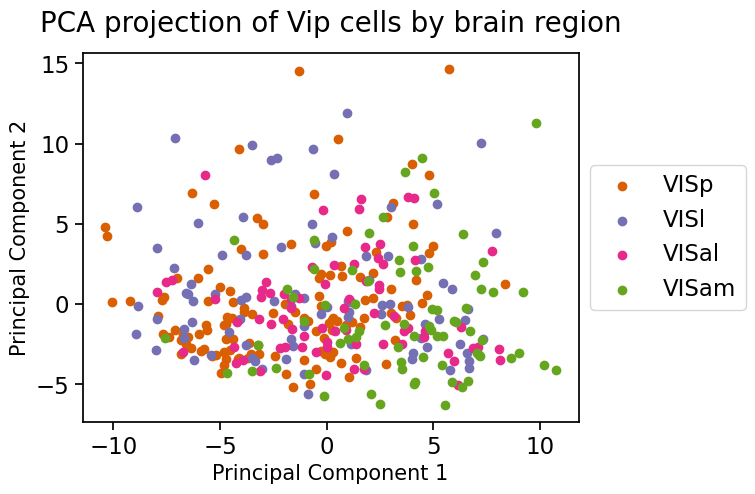

In [57]:
label2 = structure_ids_array
#Getting unique labels
structure_labels = ['VISp','VISl', 'VISal', 'VISam']
 
u_labels = np.unique(label2)
 
#plotting the results:
hues = sns.color_palette("Dark2")
 
for i in u_labels:
    plt.scatter(df_kmeans[label2 == i , 0] , df_kmeans[label2 == i , 1] , label = i, color = hues[i])
plt.legend(structure_labels,loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('PCA projection of Vip cells by brain region', fontsize = 20, pad = 15)

plt.savefig(genotype_image_path+'PCA_by_targetedstructure', format = "svg")

plt.show()


## Plot activity by cluster

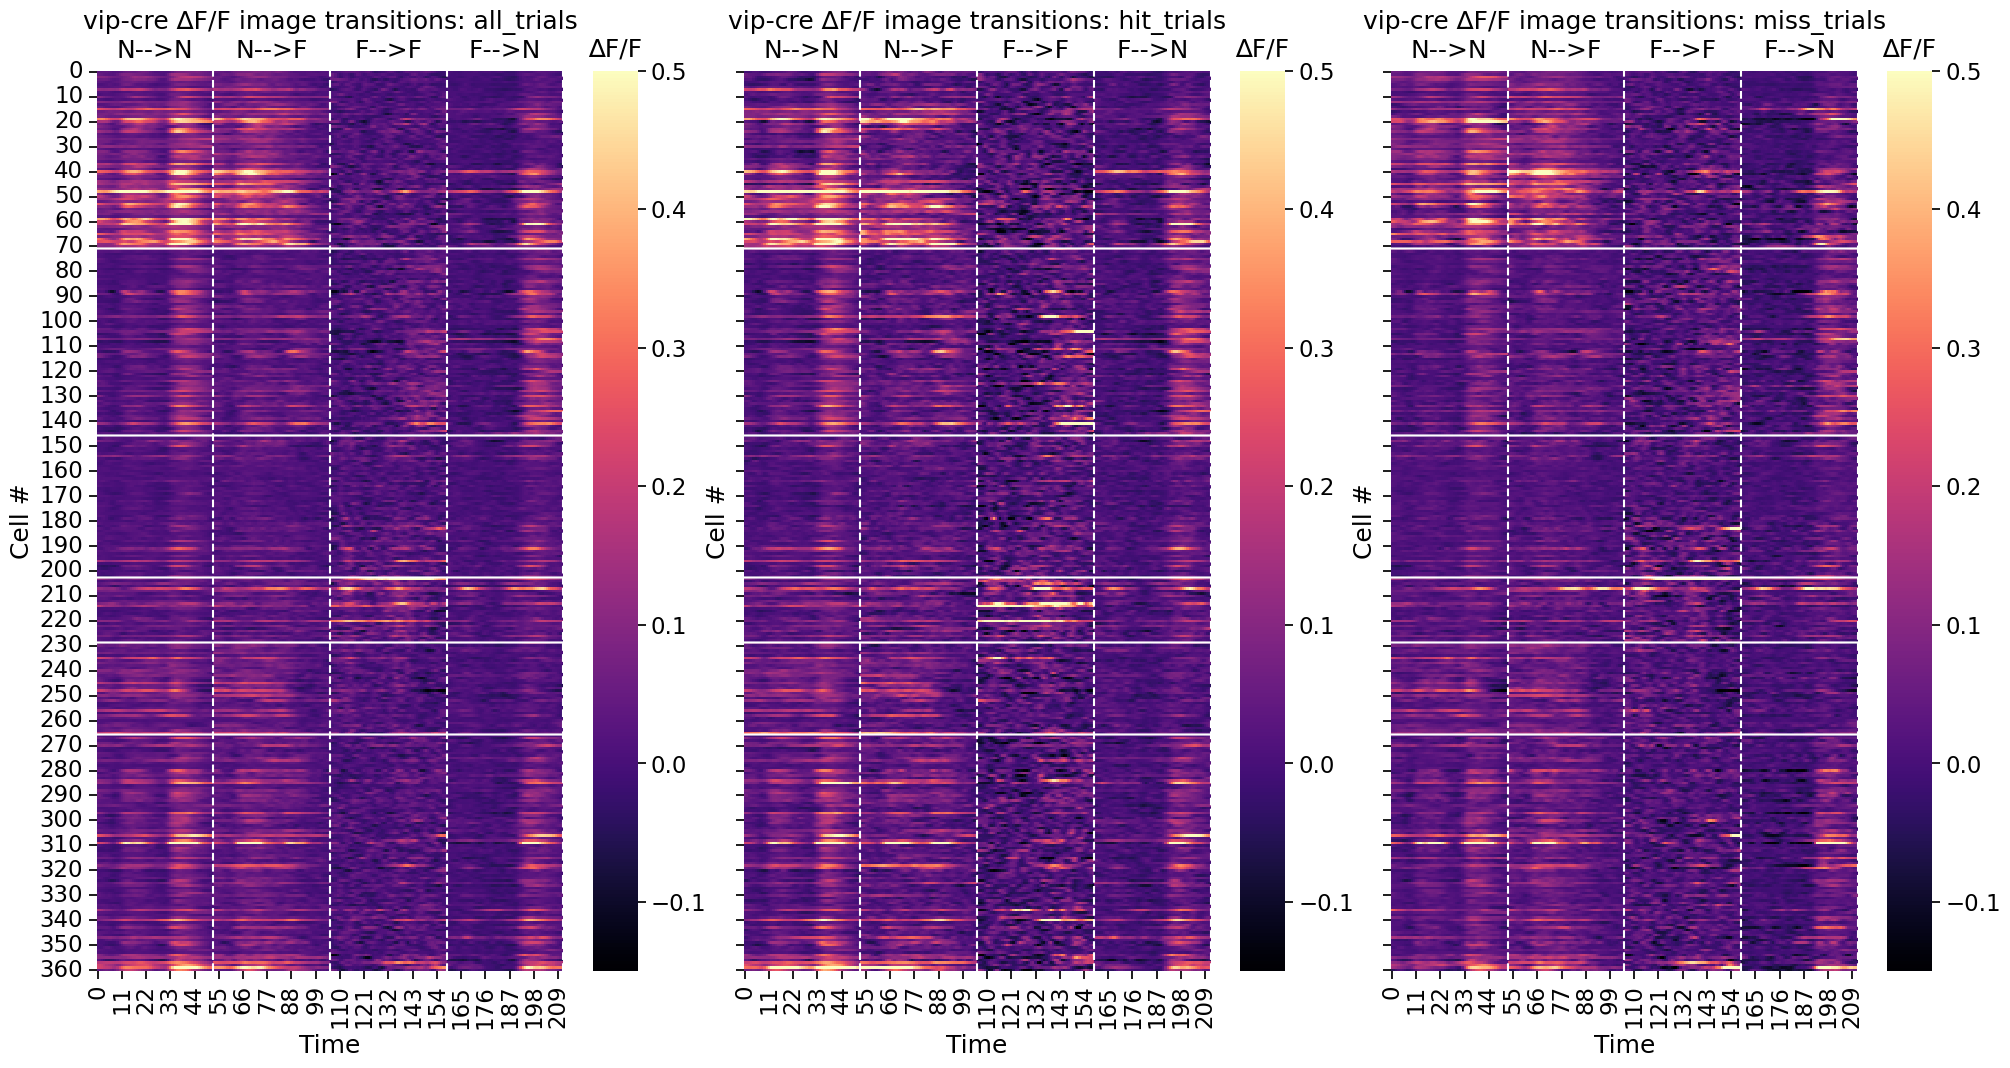

In [58]:
fig, axs = plt.subplots(1,3, sharey=True,
                        squeeze=False, #makes sure a 2D array of axs is always returned even if only 1 row/column
                        figsize = (20, 10), #have fig-size depend on number of companys/metrics
                        )
fig.tight_layout()

#dff_flat_list = []
plot_columns = ['dff_all', 'dff_hit', 'dff_miss']

for n, dff_list in enumerate(plot_columns):
    dff_array = np.array(sorted_clustered_df[dff_list].tolist())
    
    dff_flat = dff_array.reshape(len(curr_df.cell_specimen_id.unique()),-1)
    
    # Determine the positions where the kmeans_labels change
    label_changes = np.where(np.diff(sorted_clustered_df['kmeans_labels']))[0] + 1

    
    name_list = ['N-->N', 'N-->F', 'F-->F', 'F-->N']
    if n==2:
        sp = sns.heatmap(dff_flat,cmap='magma', ax=axs[0,n], vmin=-0.15, vmax=0.5)
    else:
        sp = sns.heatmap(dff_flat,cmap='magma', 
                         #cbar=False, 
                         ax=axs[0,n], vmin=-0.15, vmax=0.5)
    
    # sp = sns.heatmap(dff_flat,cmap='magma', ax=axs[0][n], vmin=-0.15, vmax=0.8)

    cbar = plt.gcf().axes[-1] 
    cbar.set_title('∆F/F', pad=10)  # Horizontal label
    #cbar.ax.yaxis.set_label_position('left')  # Position the label above the colorbar
    
    line_offset = 0
    for i in range(4):
        timepts = dff_array.shape[-1]
        sp.axvline(timepts*(i+1), color='w', linestyle='--')
        sp.text(timepts*(i+1)-timepts/2, -5, name_list[i], horizontalalignment='center')
        

        #temp_df = vip_stacked_dict[mouse_id_list[i]]
        #cell_ct = len(temp_df.cell_specimen_id.unique())
        #sp.axhline(cell_ct + line_offset, color='w', linewidth=1)
        #line_offset = line_offset + cell_ct
        
        for change in label_changes:
            sp.axhline(y=change, color='white', linewidth=1)

    # line_offset = 0
    # for mouse_id in mouse_id_list:
    #     temp_df = vip_stacked_dict[mouse_id]
    #     cell_ct = len(temp_df.cell_specimen_id.unique())
    #     plt.axhline(cell_ct + line_offset, color='w', linestyle='--', linewidth=1)
    #     line_offset = line_offset + cell_ct

    
    sp.set_title(f'{end_folder} ∆F/F image transitions: ' + groups_types_list[n], pad=30)
    sp.set_ylabel('Cell #');
    sp.set_xlabel('Time');
    
   # dff_flat_list += [dff_flat]

# Save as SVG

#plt.savefig(image_path+'dff_heatmap_'+curr_name_svg, format="svg")

plt.savefig(genotype_image_path+'sorted_dff_heatmap', format = "svg")
plt.show()

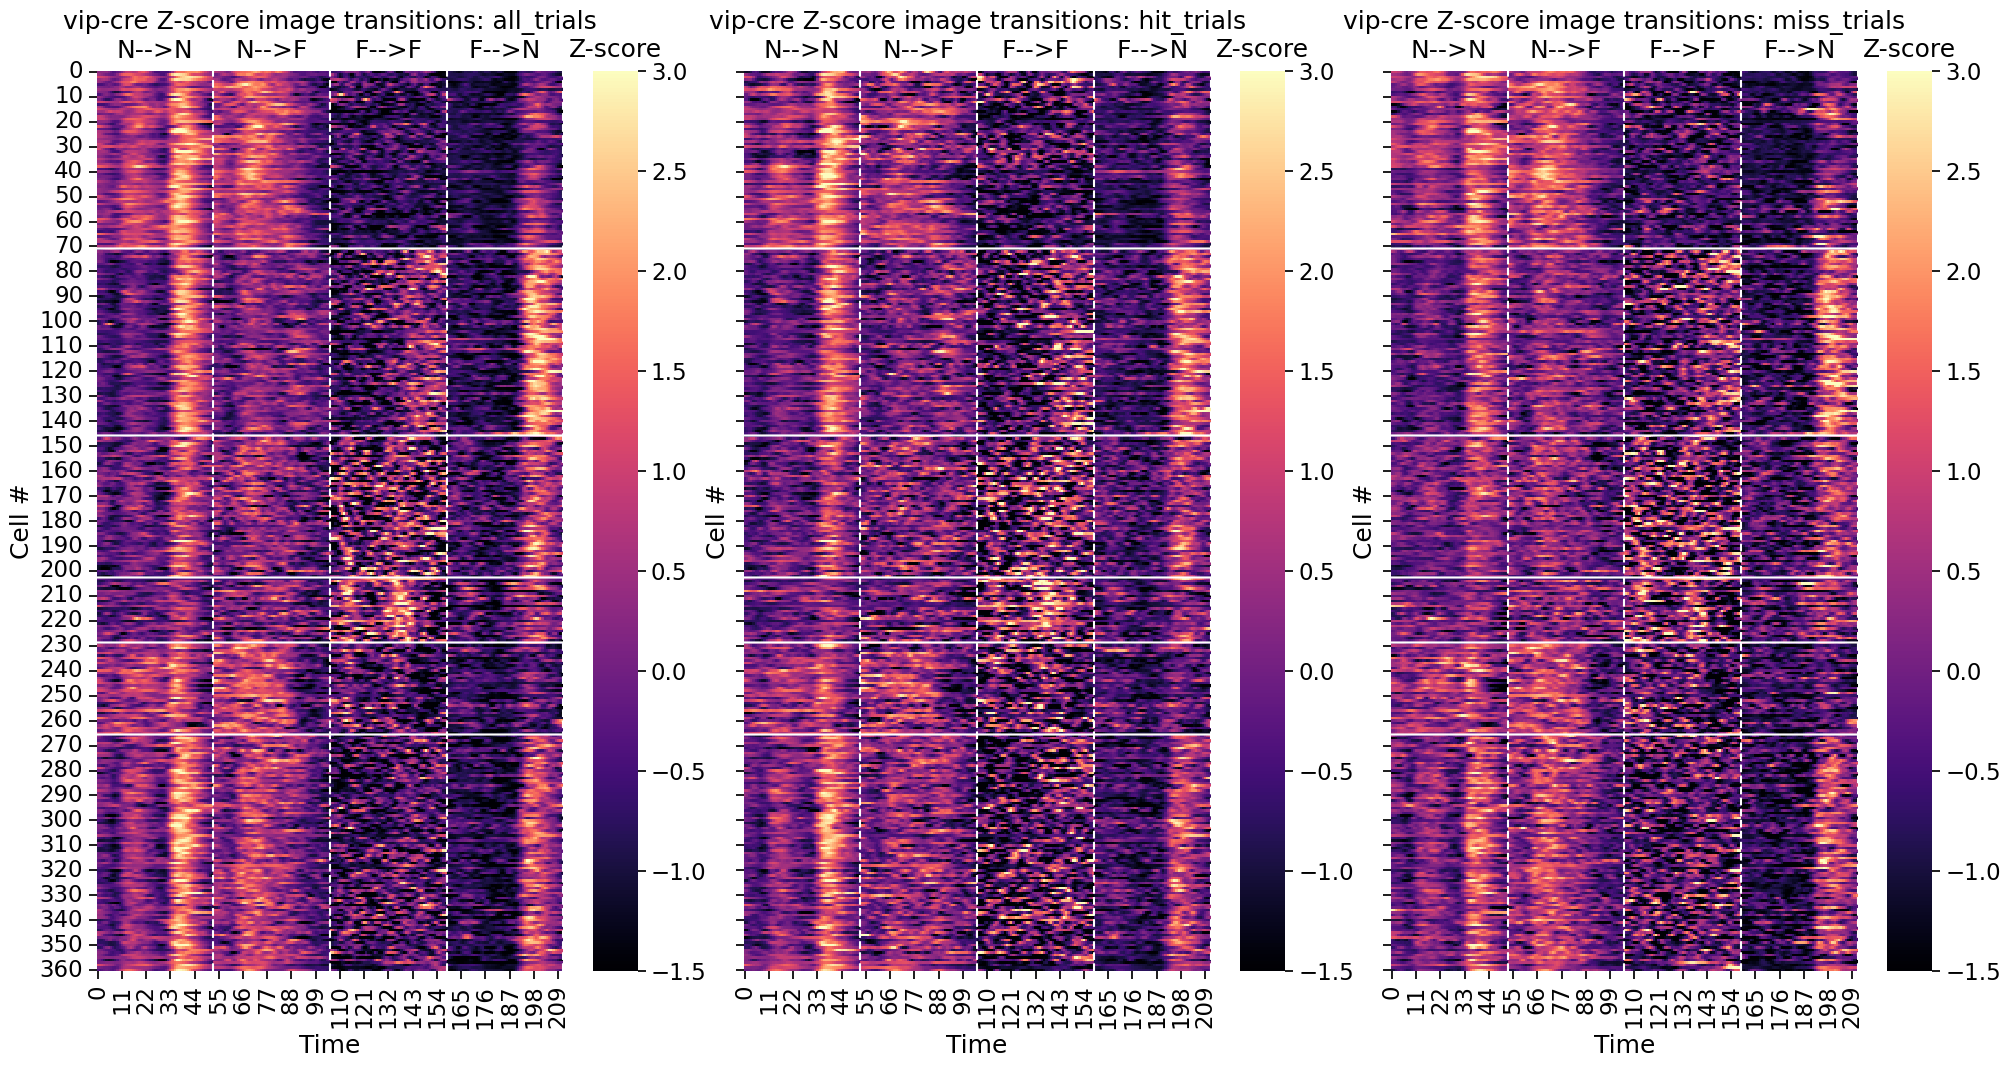

In [59]:
fig, axs = plt.subplots(1,3, sharey=True,
                        squeeze=False, #makes sure a 2D array of axs is always returned even if only 1 row/column
                        figsize = (20, 10), #have fig-size depend on number of companys/metrics
                        )
fig.tight_layout()

#dff_flat_list = []
plot_columns = ['z_all', 'z_hit', 'z_miss']

for n, dff_list in enumerate(plot_columns):
    dff_flat = np.array(sorted_clustered_df[dff_list].tolist())
    
    #dff_flat = dff_array.reshape(len(curr_df.cell_specimen_id.unique()),-1)
    
    # Determine the positions where the kmeans_labels change
    label_changes = np.where(np.diff(sorted_clustered_df['kmeans_labels']))[0] + 1

    
    name_list = ['N-->N', 'N-->F', 'F-->F', 'F-->N']
    if n==2:
        sp = sns.heatmap(dff_flat,cmap='magma', ax=axs[0,n], vmin=-1.5, vmax=3)
    else:
        sp = sns.heatmap(dff_flat,cmap='magma', 
                         #cbar=False, 
                         ax=axs[0,n], vmin=-1.5, vmax=3)
    
    # sp = sns.heatmap(dff_flat,cmap='magma', ax=axs[0][n], vmin=-0.15, vmax=0.8)

    cbar = plt.gcf().axes[-1] 
    cbar.set_title('Z-score', pad=10)  # Horizontal label
    #cbar.ax.yaxis.set_label_position('left')  # Position the label above the colorbar
    
    line_offset = 0
    for i in range(4):
        timepts = dff_array.shape[-1]
        sp.axvline(timepts*(i+1), color='w', linestyle='--')
        sp.text(timepts*(i+1)-timepts/2, -5, name_list[i], horizontalalignment='center')
        

        #temp_df = vip_stacked_dict[mouse_id_list[i]]
        #cell_ct = len(temp_df.cell_specimen_id.unique())
        #sp.axhline(cell_ct + line_offset, color='w', linewidth=1)
        #line_offset = line_offset + cell_ct
        
        for change in label_changes:
            sp.axhline(y=change, color='white', linewidth=1)

    # line_offset = 0
    # for mouse_id in mouse_id_list:
    #     temp_df = vip_stacked_dict[mouse_id]
    #     cell_ct = len(temp_df.cell_specimen_id.unique())
    #     plt.axhline(cell_ct + line_offset, color='w', linestyle='--', linewidth=1)
    #     line_offset = line_offset + cell_ct

    
    sp.set_title(f'{end_folder} Z-score image transitions: ' + groups_types_list[n], pad=30)
    sp.set_ylabel('Cell #');
    sp.set_xlabel('Time');
    
 #   dff_flat_list += [dff_flat]

# Save as SVG

plt.savefig(genotype_image_path+'sorted_zscore_heatmap', format = "svg")
plt.show()

## Plot cell distribution across clusters

In [61]:

sorted_clustered_df.groupby(['kmeans_labels', 'cell_specimen_id']).count().reset_index().groupby(['kmeans_labels']).count()[['cell_specimen_id']]


cell_specimen_id
kmeans_labels                  
0                            71
1                            75
2                            57
3                            26
4                            37
5                            95

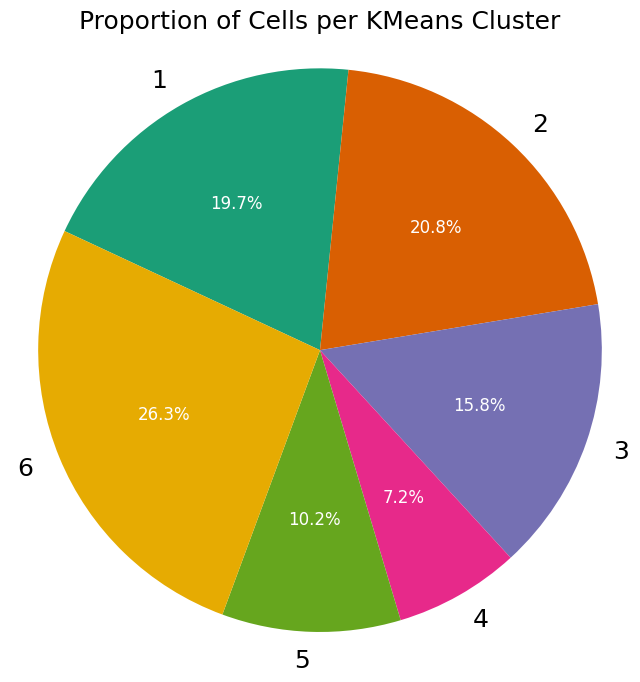

In [91]:
# Calculate the number of cells per KMeans cluster
cell_counts = sorted_clustered_df.groupby(['kmeans_labels', 'cell_specimen_id']).count().reset_index().groupby(['kmeans_labels']).count()[['cell_specimen_id']]

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(cell_counts['cell_specimen_id'], labels=cell_counts.index+1, autopct='%1.1f%%', startangle=155, colors=sns.color_palette("Dark2"),
                                  textprops={'fontsize': 18, 'color': 'black'},  # Font size and color for the labels
                                  counterclock=False
                                 )

# Customize the font size and color of the percentages
for autotext in autotexts:
    autotext.set_fontsize(12)  # Set the font size of the percentages
    autotext.set_color('white')  # Set the color of the percentages

# Add a title
ax.set_title('Proportion of Cells per KMeans Cluster', pad=10)

# Equal aspect ratio ensures that the pie is drawn as a circle.
ax.axis('equal')  

# Display the plot
plt.show()

In [29]:
# dff_flat_list contains np flattened arrays for 0: all trials, 1: hit trials, and 2: miss trials
#dff_concat = np.hstack((dff_flat_list[0], dff_flat_list[2]))
dff_concat = np.array(dff_flat_list[0])
dff_hit_concat = np.array(dff_flat_list[1])
dff_miss_concat = np.array(dff_flat_list[2])

In [30]:
z_data_flat = stats.zscore(dff_concat,axis=1)
z_data_hit = stats.zscore(dff_hit_concat,axis=1)
z_data_miss = stats.zscore(dff_miss_concat,axis=1)

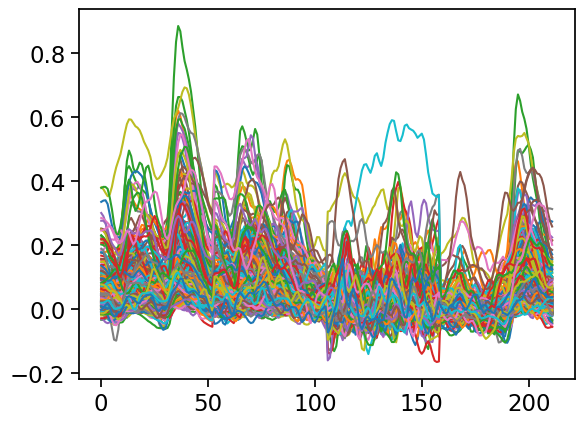

In [31]:
plt.plot(dff_concat.T);

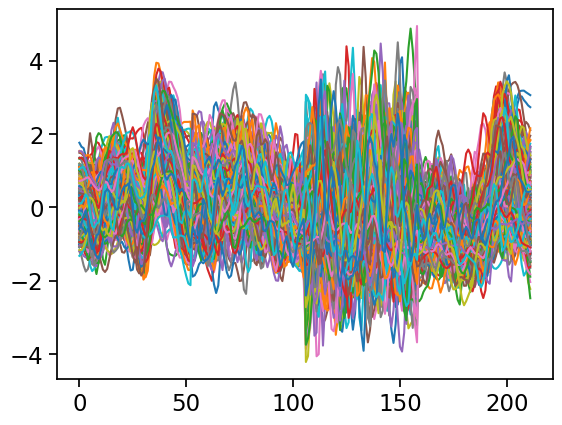

In [32]:
plt.plot(z_data_flat.T);

# Silhouette Score

In [33]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score


## assign which data to cluster

In [34]:
data_to_cluster = z_data_flat

For n_clusters = 2 The average silhouette_score is : 0.10234456887537409
For n_clusters = 3 The average silhouette_score is : 0.09477972147331849
For n_clusters = 4 The average silhouette_score is : 0.06628986233025537
For n_clusters = 5 The average silhouette_score is : 0.061871710459433175
For n_clusters = 6 The average silhouette_score is : 0.058069336870177055
For n_clusters = 7 The average silhouette_score is : 0.045063451224001606
For n_clusters = 8 The average silhouette_score is : 0.04999069648593577
For n_clusters = 9 The average silhouette_score is : 0.05209412767497034
For n_clusters = 10 The average silhouette_score is : 0.04710234034532313
For n_clusters = 11 The average silhouette_score is : 0.04156940198729267


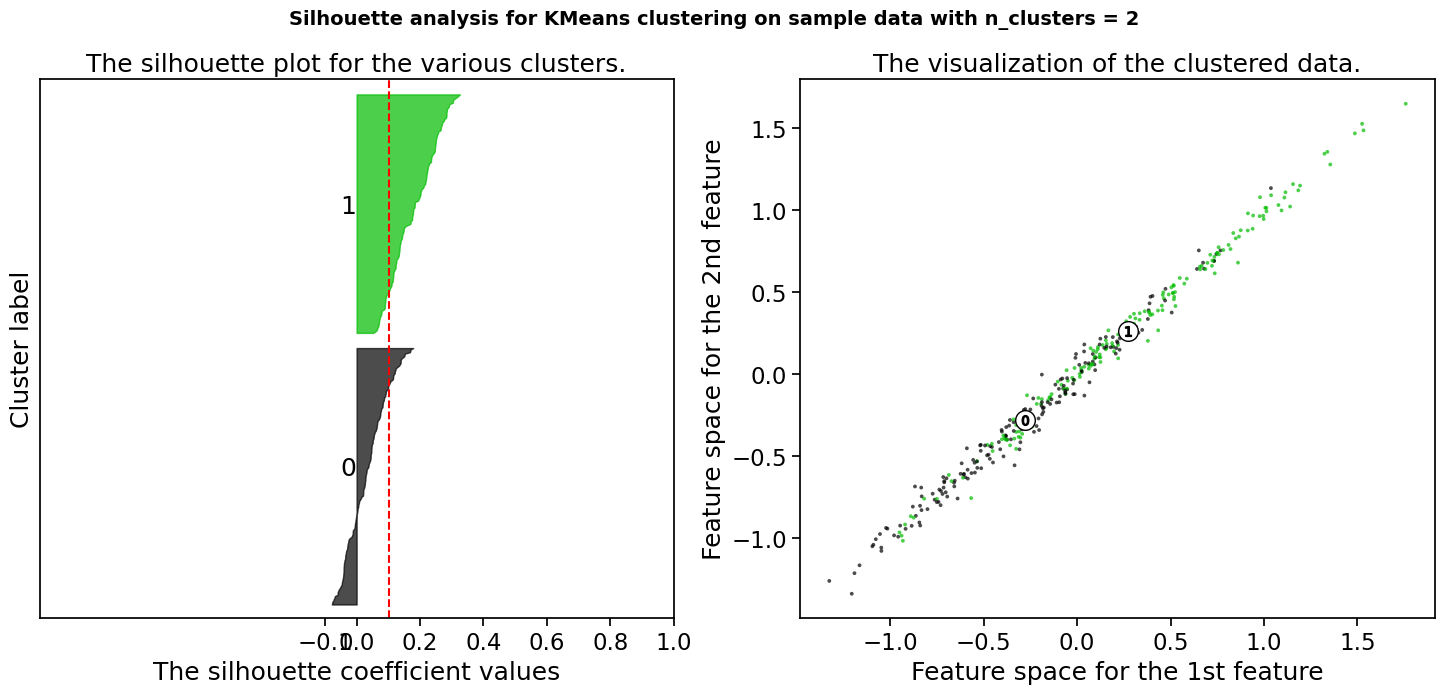

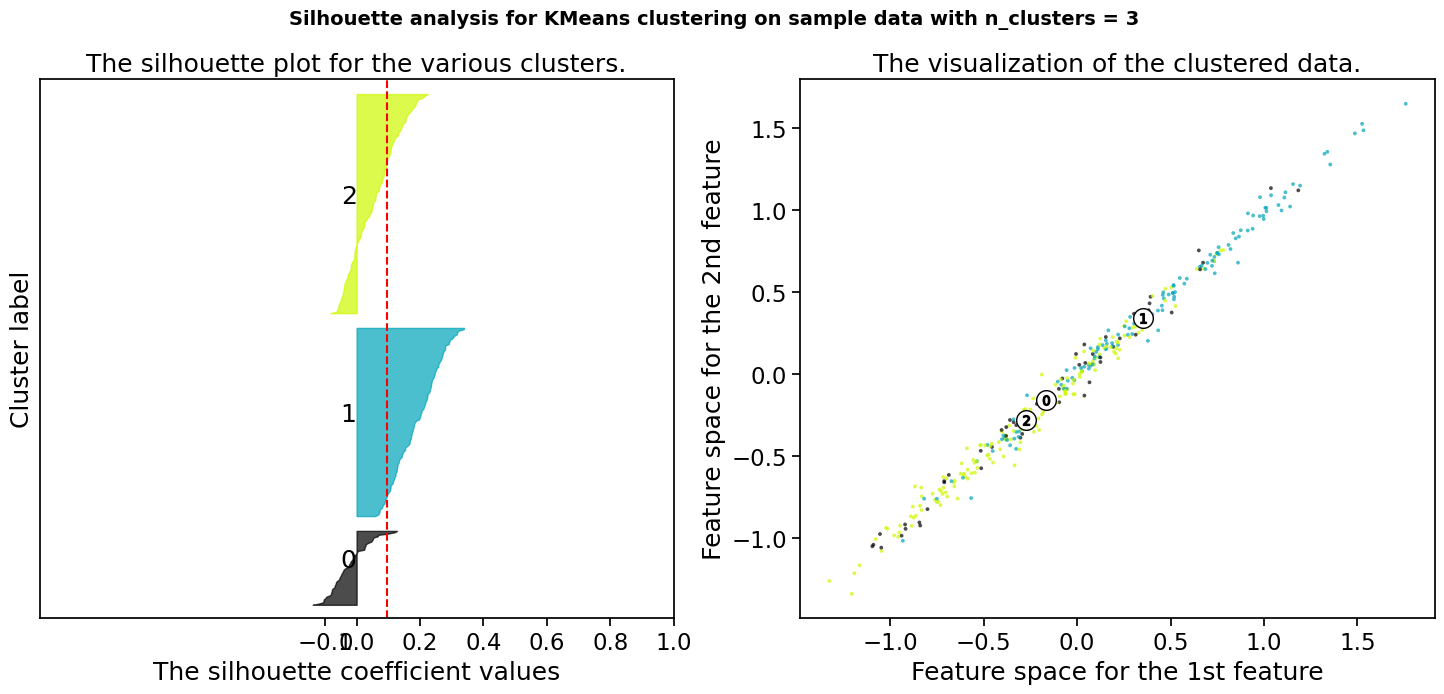

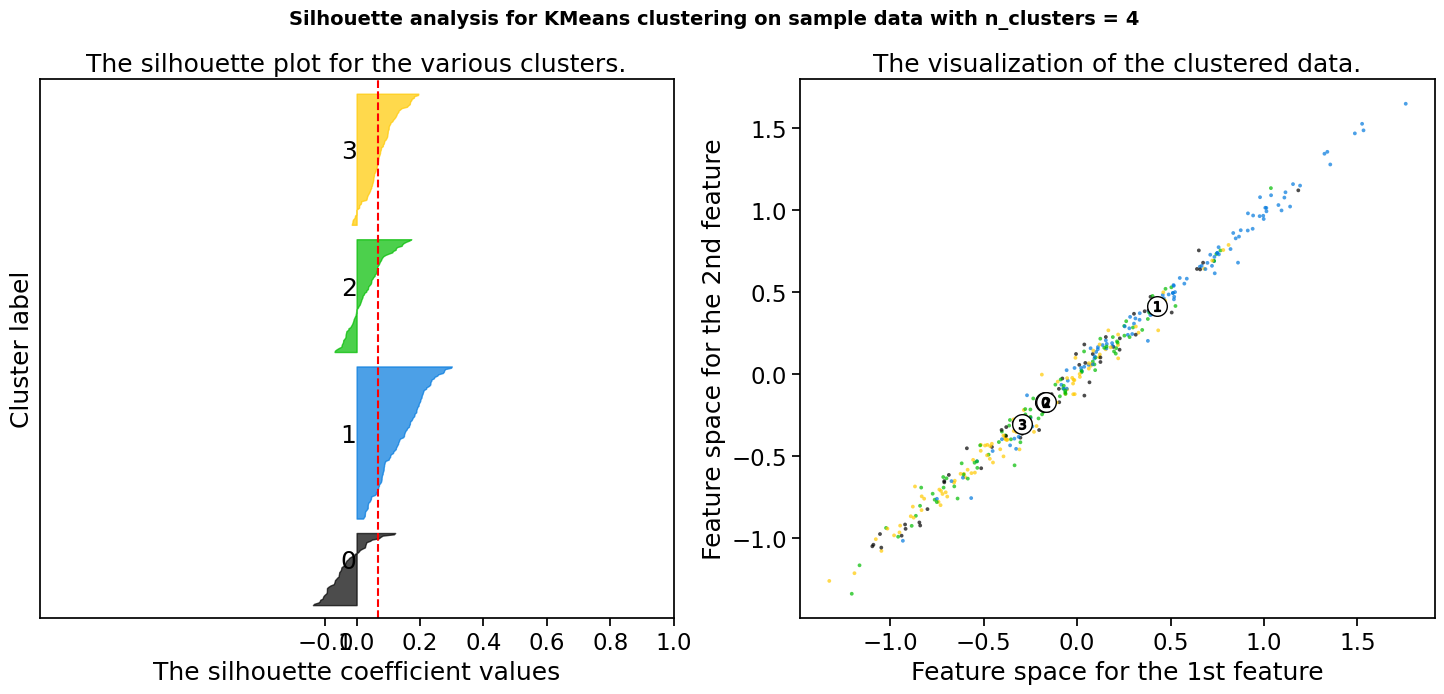

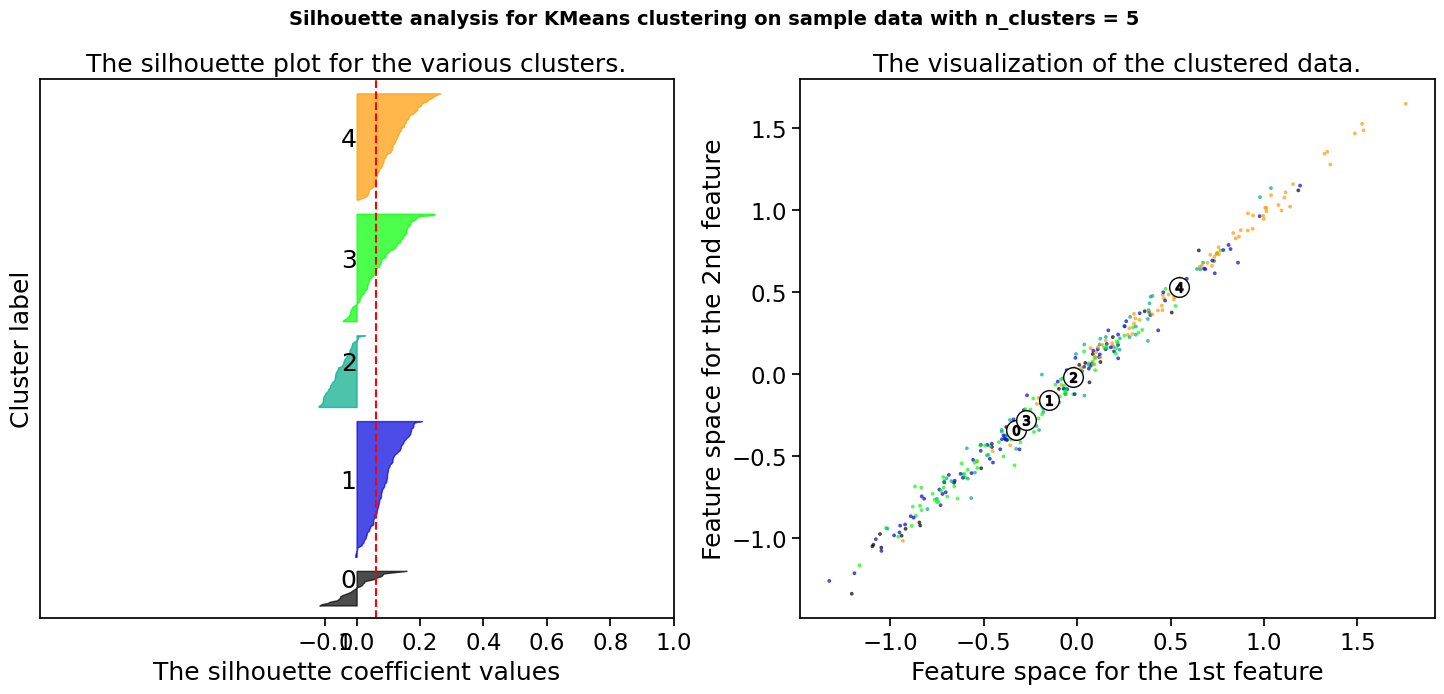

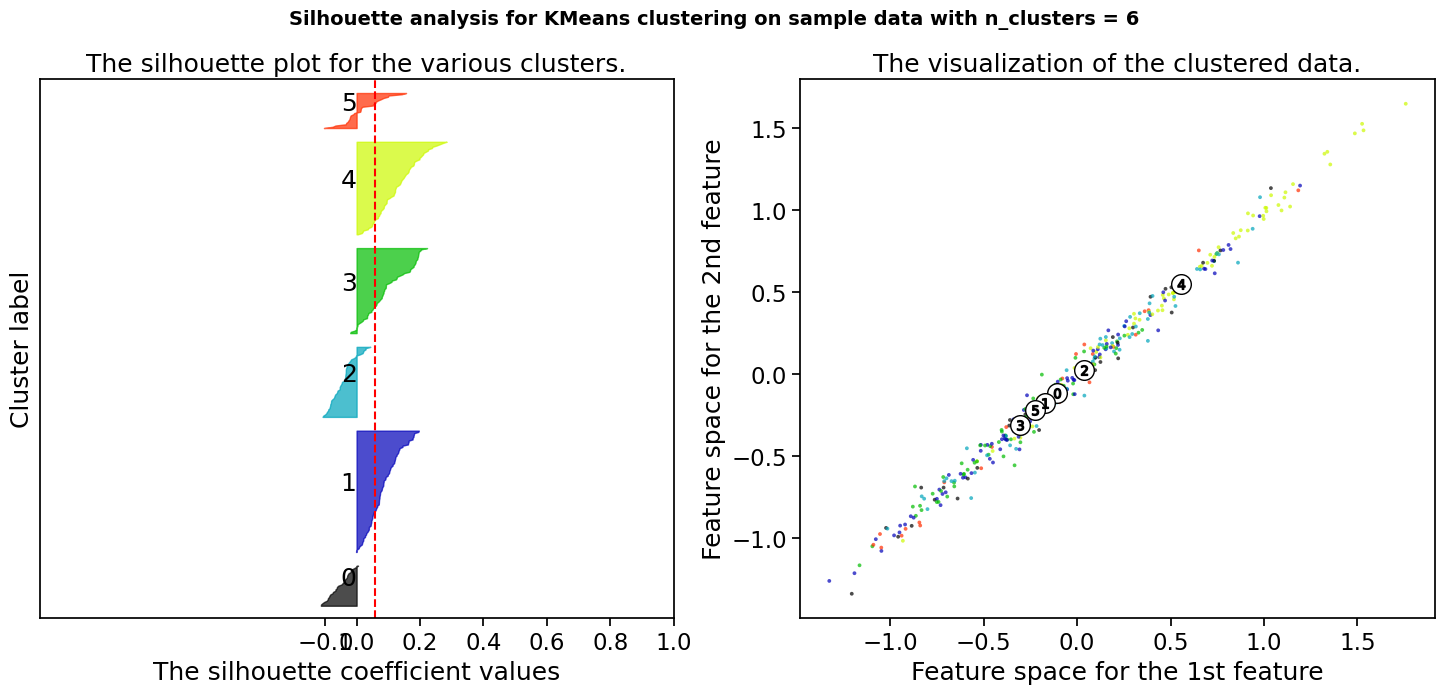

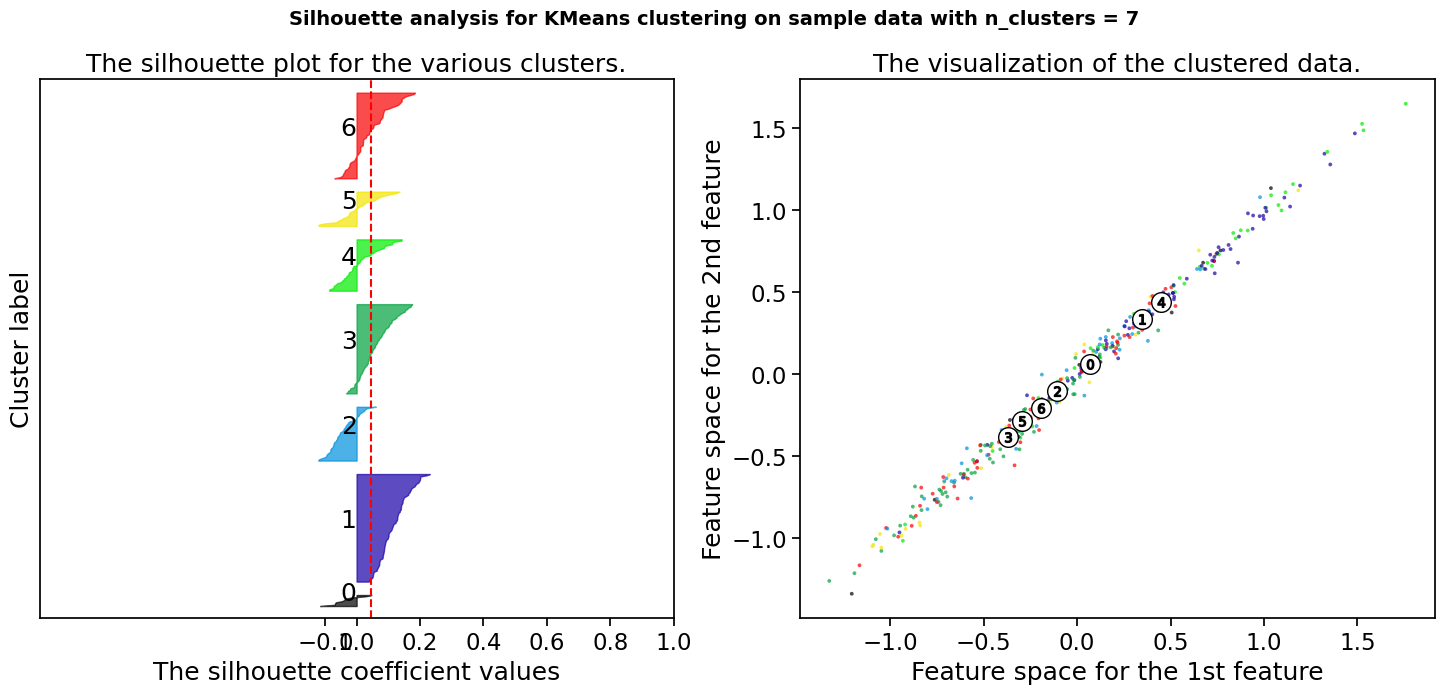

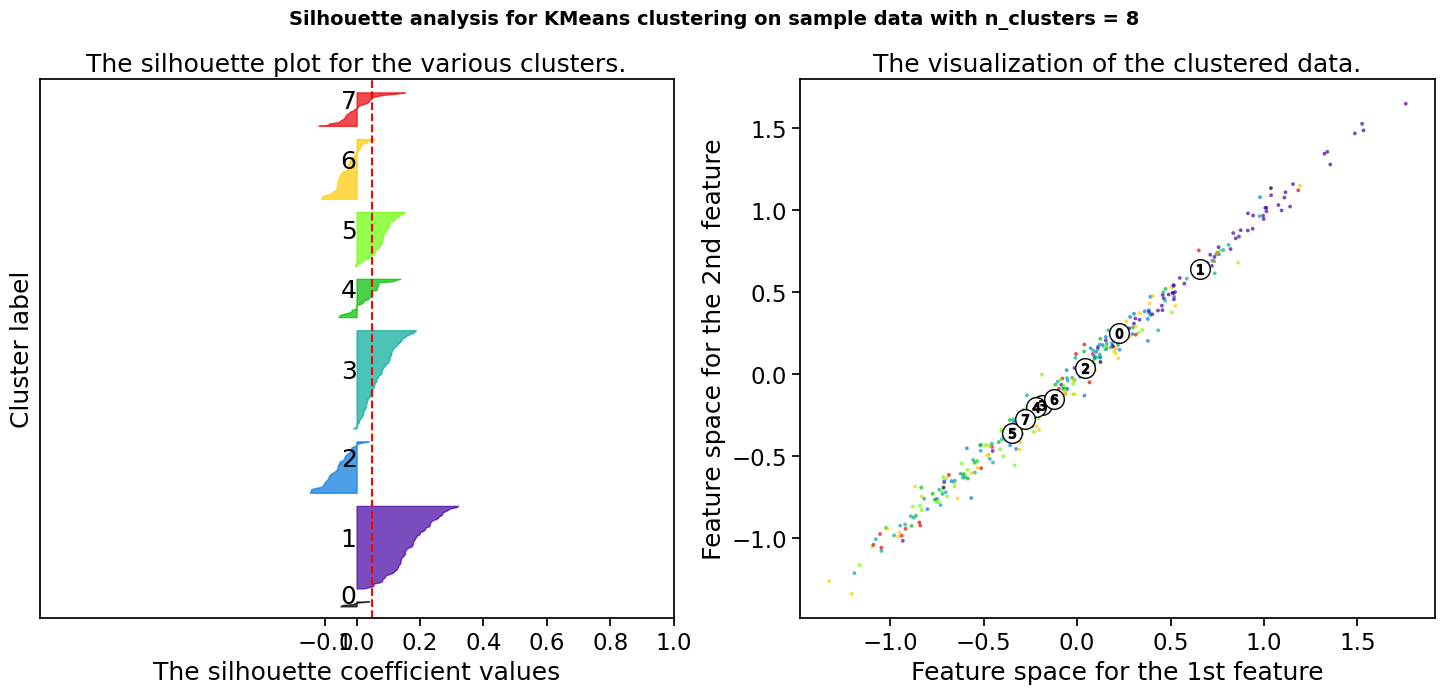

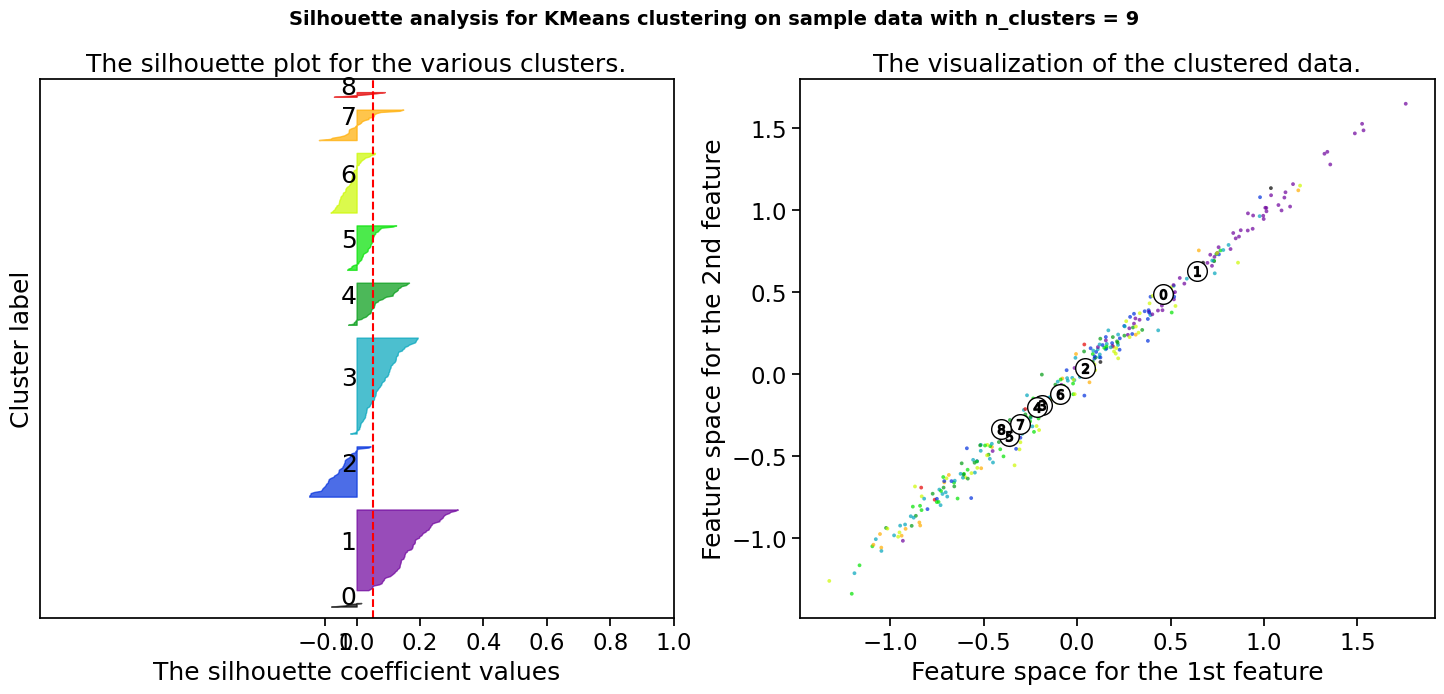

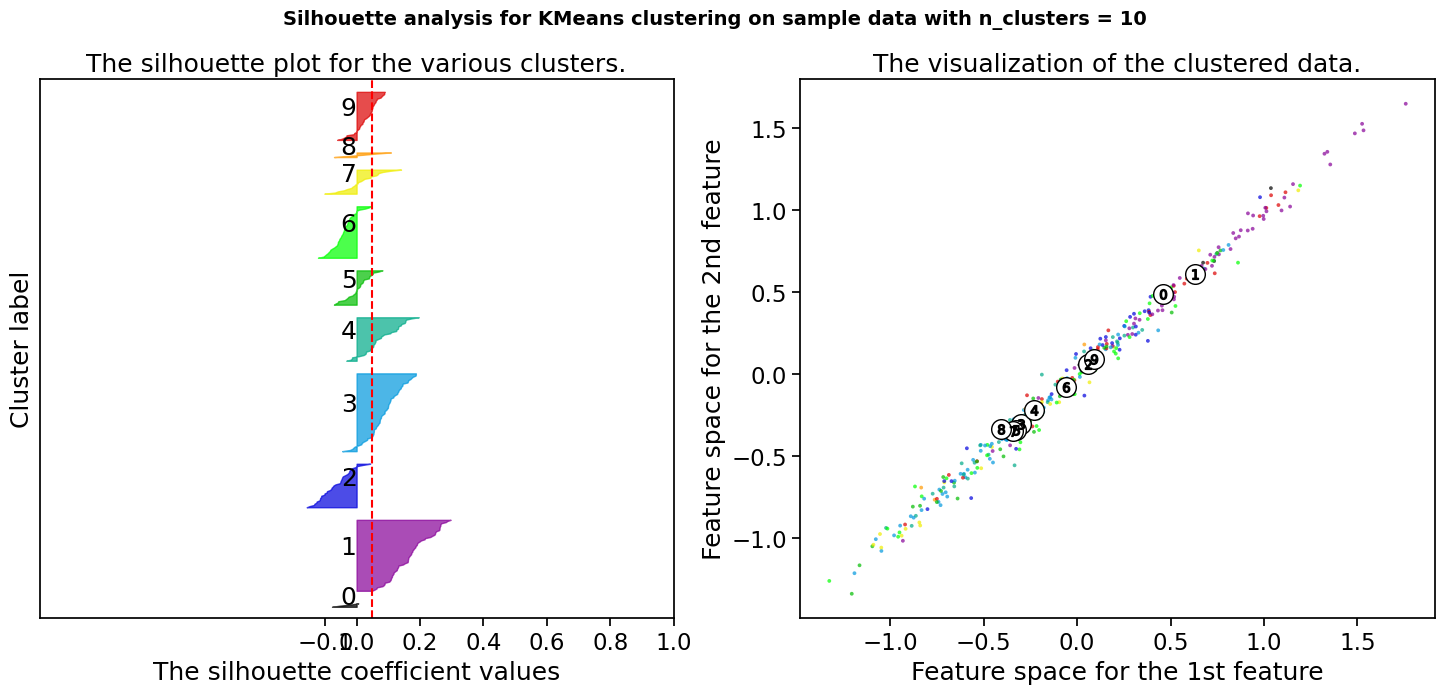

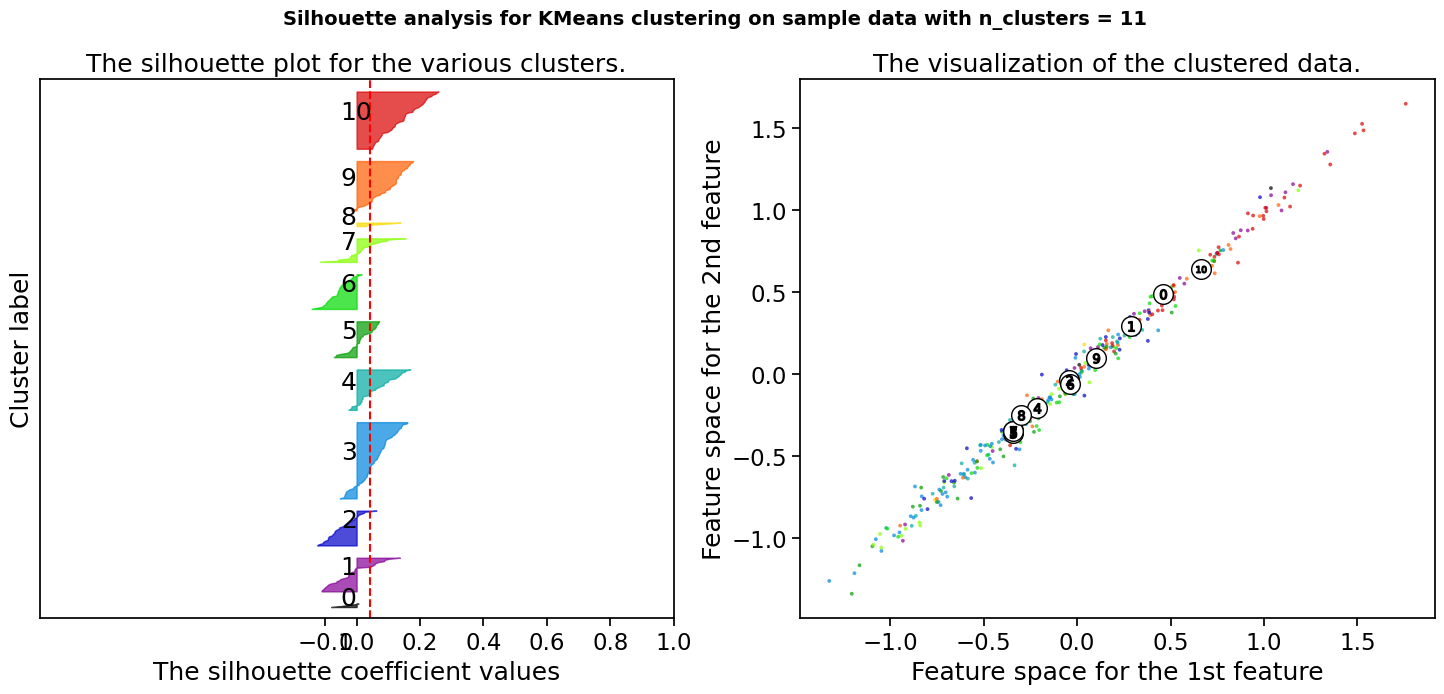

In [35]:


# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
# X, y = make_blobs(
#     n_samples=500,
#     n_features=2,
#     centers=4,
#     cluster_std=1,
#     center_box=(-10.0, 10.0),
#     shuffle=True,
#     random_state=1,
# )  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
silhouette_list = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_to_cluster) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_to_cluster)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_to_cluster, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    silhouette_list.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_to_cluster, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data_to_cluster[:, 0], data_to_cluster[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Text(0, 0.5, 'Silhouette score')

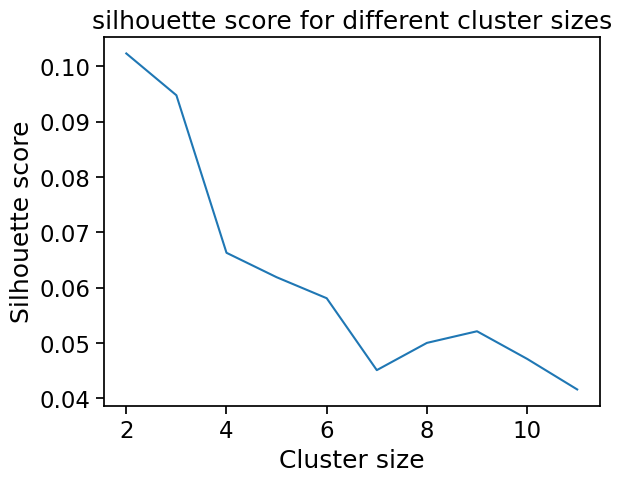

In [36]:
# plot silhouette scores:
#sil_scores = [0.05678667949056855, 0.0503501752731177, 0.04842927896017404, 0.04119648460883629, 0.03887885728616518, 0.04372803573890765, 0.040548893560572445]
clus_num = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

plt.plot(clus_num, silhouette_list)
plt.title("silhouette score for different cluster sizes")
plt.xlabel("Cluster size")
plt.ylabel("Silhouette score")

# K Means Clustering WITH PCA

In [37]:
# Assign the number of clusters
num_clusters = 6

In [38]:
import random


pca = PCA(2)

#Transform the data
df_kmeans = pca.fit_transform(data_to_cluster)
 
df_kmeans.shape

(361, 2)

In [39]:


kmeans = KMeans(n_clusters= num_clusters, random_state = 50)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df_kmeans)
 


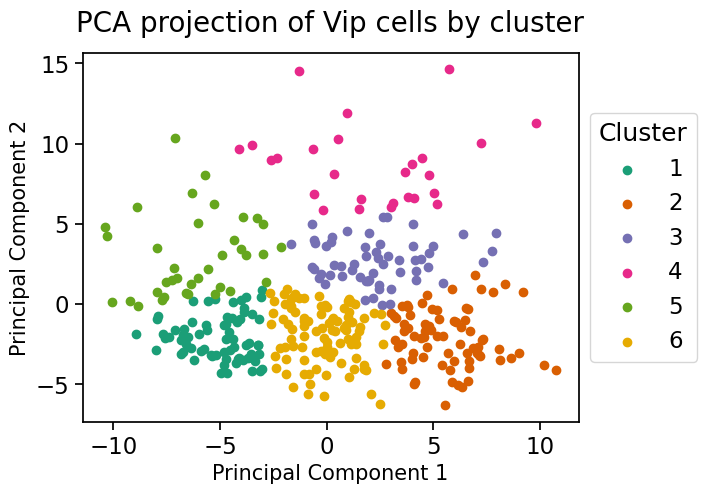

In [40]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
hues = sns.color_palette("Dark2")
 
for i in u_labels:
    plt.scatter(df_kmeans[label == i , 0] , df_kmeans[label == i , 1] , label = i+1, color = hues[i])
plt.legend(title='Cluster', loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('PCA projection of Vip cells by cluster', fontsize = 20, pad = 15)


plt.savefig(genotype_image_path+'PCA_by_clusters', format = "svg")
plt.show()

In [41]:
#kmeans = KMeans(n_clusters=num_clusters).fit(data_to_cluster)


In [42]:
# for cell_specimen_id in stim_response_stack_nn.cell_specimen_id.unique()

# Get the unique cell_specimen_ids
unique_cell_ids = stim_response_stack_nn.cell_specimen_id.unique()

# Initialize an empty list to store the targeted_structure_id values
structure_ids = []

cell_id_list_2 = []

# Loop through each unique cell_specimen_id
for cell_specimen_id in unique_cell_ids:
    # Get the targeted_structure_id for the current cell_specimen_id
    # Assuming that each cell_specimen_id is associated with only one targeted_structure_id
    targeted_structure_id = stim_response_stack_nn.loc[stim_response_stack_nn.cell_specimen_id == cell_specimen_id, 'targeted_structure_id'].iloc[0]
    
    # Append the targeted_structure_id to the list
    structure_ids.append(targeted_structure_id)
    cell_id_list_2.append(cell_specimen_id)

# Convert the list to an ndarray
structure_ids_array = np.array(structure_ids)


In [43]:
cell_id_list == cell_id_list_2

True

## Convert back to data frame

In [44]:
# Convert each row of the array to a list
z_all_list = [list(row) for row in z_data_flat]

# Convert each row of the array to a list
z_hit_list = [list(row) for row in z_data_hit]

# Convert each row of the array to a list
z_miss_list = [list(row) for row in z_data_miss]

df_kmeans_list = [list(row) for row in df_kmeans]

In [45]:
clustered_df = pd.DataFrame(
{"targeted_structure_id" : structure_ids,
"cell_specimen_id" : cell_id_list, "df_kmeans" : df_kmeans_list, "z_all" : z_all_list, "z_hit" : z_hit_list, "z_miss" : z_miss_list})
clustered_df

targeted_structure_id  cell_specimen_id  \
0                        1        1120054836   
1                        1        1120054947   
2                        1        1120055050   
3                        1        1120055116   
4                        1        1120055188   
..                     ...               ...   
356                      2        1120133003   
357                      2        1120133014   
358                      2        1120133031   
359                      2        1120133064   
360                      2        1120133086   

                                      df_kmeans  \
0     [-0.7702030620458534, -4.954899081292985]   
1     [-3.682553019101857, -3.3731259478788935]   
2     [-1.0638791996623127, -3.507963468804864]   
3     [-0.8910092525237493, -1.051747123900962]   
4      [-4.936984050999329, -4.291518323514456]   
..                                          ...   
356   [-4.605661976880259, -1.7039854687725562]   
357  [-1.6541102565875045, -2.1656212222402424]   
358   [-0.5618345566232925, 3.8118689029981168]   
359    [-3.7884989818240884, 3.077019997352921]   
360     [2.873498927728835, 3.0140545412257924]   

                                                 z_all  \
0    [-0.3837923903781318, -0.37937746150750357, -0...   
1    [-0.3878624819719517, -0.3941102700324153, -0....   
2    [0.4339966950855461, 0.2659652317871037, -0.06...   
3    [-0.15506136578739066, -0.16062375770497622, -...   
4    [0.8210196179022248, 0.7619801125891507, 0.650...   
..                                                 ...   
356  [0.7125560132047133, 0.7273716429766948, 0.754...   
357  [0.46127937543751907, 0.49807286785949567, 0.4...   
358  [0.6583385571408311, 0.6377835141124235, 0.542...   
359  [0.09427890139659928, 0.10679796756559493, 0.2...   
360  [-0.5898429763411974, -0.4536914028319953, -0....   

                                                 z_hit  \
0    [-0.13441460898902063, -0.15551698339752873, -...   
1    [-0.27496957516446957, -0.2865277998969682, -0...   
2    [0.42568014526336667, 0.2659490236468876, -0.0...   
3    [-0.09124062439106975, -0.14086970084100525, -...   
4    [0.8527274989004356, 0.796629486316498, 0.6797...   
..                                                 ...   
356  [0.3621654100587246, 0.36141010392827316, 0.38...   
357  [0.02207188765600687, 0.07991225753623674, 0.1...   
358  [0.41867338141725957, 0.35339662754277157, 0.1...   
359  [-0.30820309851384453, -0.2691622163105047, -0...   
360  [-0.27723453019146743, -0.1839537676412023, -0...   

                                                z_miss  
0    [-1.0649519600644943, -0.9739377104782682, -0....  
1    [-0.6438130459944202, -0.6258487907158845, -0....  
2    [0.2618090162091398, 0.12939111341693907, -0.1...  
3    [-0.8442164390148058, -0.7181416019126152, -0....  
4    [0.1156709753421304, 0.06739920797969698, 0.03...  
..                                                 ...  
356  [1.1909525289497414, 1.2293426923970199, 1.250...  
357  [1.0559927365033241, 0.9988321107518062, 0.802...  
358  [0.884397215099534, 0.913868644705367, 0.89684...  
359  [0.5293183567381107, 0.603087321807436, 0.7910...  
360  [-0.6729087792348395, -0.6386593644079404, -0....  

[361 rows x 6 columns]

In [46]:
len(kmeans.labels_)

361

In [47]:
clustered_df['kmeans_labels'] = kmeans.labels_
clustered_df

targeted_structure_id  cell_specimen_id  \
0                        1        1120054836   
1                        1        1120054947   
2                        1        1120055050   
3                        1        1120055116   
4                        1        1120055188   
..                     ...               ...   
356                      2        1120133003   
357                      2        1120133014   
358                      2        1120133031   
359                      2        1120133064   
360                      2        1120133086   

                                      df_kmeans  \
0     [-0.7702030620458534, -4.954899081292985]   
1     [-3.682553019101857, -3.3731259478788935]   
2     [-1.0638791996623127, -3.507963468804864]   
3     [-0.8910092525237493, -1.051747123900962]   
4      [-4.936984050999329, -4.291518323514456]   
..                                          ...   
356   [-4.605661976880259, -1.7039854687725562]   
357  [-1.6541102565875045, -2.1656212222402424]   
358   [-0.5618345566232925, 3.8118689029981168]   
359    [-3.7884989818240884, 3.077019997352921]   
360     [2.873498927728835, 3.0140545412257924]   

                                                 z_all  \
0    [-0.3837923903781318, -0.37937746150750357, -0...   
1    [-0.3878624819719517, -0.3941102700324153, -0....   
2    [0.4339966950855461, 0.2659652317871037, -0.06...   
3    [-0.15506136578739066, -0.16062375770497622, -...   
4    [0.8210196179022248, 0.7619801125891507, 0.650...   
..                                                 ...   
356  [0.7125560132047133, 0.7273716429766948, 0.754...   
357  [0.46127937543751907, 0.49807286785949567, 0.4...   
358  [0.6583385571408311, 0.6377835141124235, 0.542...   
359  [0.09427890139659928, 0.10679796756559493, 0.2...   
360  [-0.5898429763411974, -0.4536914028319953, -0....   

                                                 z_hit  \
0    [-0.13441460898902063, -0.15551698339752873, -...   
1    [-0.27496957516446957, -0.2865277998969682, -0...   
2    [0.42568014526336667, 0.2659490236468876, -0.0...   
3    [-0.09124062439106975, -0.14086970084100525, -...   
4    [0.8527274989004356, 0.796629486316498, 0.6797...   
..                                                 ...   
356  [0.3621654100587246, 0.36141010392827316, 0.38...   
357  [0.02207188765600687, 0.07991225753623674, 0.1...   
358  [0.41867338141725957, 0.35339662754277157, 0.1...   
359  [-0.30820309851384453, -0.2691622163105047, -0...   
360  [-0.27723453019146743, -0.1839537676412023, -0...   

                                                z_miss  kmeans_labels  
0    [-1.0649519600644943, -0.9739377104782682, -0....              5  
1    [-0.6438130459944202, -0.6258487907158845, -0....              0  
2    [0.2618090162091398, 0.12939111341693907, -0.1...              5  
3    [-0.8442164390148058, -0.7181416019126152, -0....              5  
4    [0.1156709753421304, 0.06739920797969698, 0.03...              0  
..                                                 ...            ...  
356  [1.1909525289497414, 1.2293426923970199, 1.250...              0  
357  [1.0559927365033241, 0.9988321107518062, 0.802...              5  
358  [0.884397215099534, 0.913868644705367, 0.89684...              2  
359  [0.5293183567381107, 0.603087321807436, 0.7910...              4  
360  [-0.6729087792348395, -0.6386593644079404, -0....              2  

[361 rows x 7 columns]

In [48]:
clustered_df['dff_all'] = dff_all_list
clustered_df['dff_hit'] = dff_hit_list
clustered_df['dff_miss'] = dff_miss_list
#clustered_df['z_all'] = z_data_flat
clustered_df


targeted_structure_id  cell_specimen_id  \
0                        1        1120054836   
1                        1        1120054947   
2                        1        1120055050   
3                        1        1120055116   
4                        1        1120055188   
..                     ...               ...   
356                      2        1120133003   
357                      2        1120133014   
358                      2        1120133031   
359                      2        1120133064   
360                      2        1120133086   

                                      df_kmeans  \
0     [-0.7702030620458534, -4.954899081292985]   
1     [-3.682553019101857, -3.3731259478788935]   
2     [-1.0638791996623127, -3.507963468804864]   
3     [-0.8910092525237493, -1.051747123900962]   
4      [-4.936984050999329, -4.291518323514456]   
..                                          ...   
356   [-4.605661976880259, -1.7039854687725562]   
357  [-1.6541102565875045, -2.1656212222402424]   
358   [-0.5618345566232925, 3.8118689029981168]   
359    [-3.7884989818240884, 3.077019997352921]   
360     [2.873498927728835, 3.0140545412257924]   

                                                 z_all  \
0    [-0.3837923903781318, -0.37937746150750357, -0...   
1    [-0.3878624819719517, -0.3941102700324153, -0....   
2    [0.4339966950855461, 0.2659652317871037, -0.06...   
3    [-0.15506136578739066, -0.16062375770497622, -...   
4    [0.8210196179022248, 0.7619801125891507, 0.650...   
..                                                 ...   
356  [0.7125560132047133, 0.7273716429766948, 0.754...   
357  [0.46127937543751907, 0.49807286785949567, 0.4...   
358  [0.6583385571408311, 0.6377835141124235, 0.542...   
359  [0.09427890139659928, 0.10679796756559493, 0.2...   
360  [-0.5898429763411974, -0.4536914028319953, -0....   

                                                 z_hit  \
0    [-0.13441460898902063, -0.15551698339752873, -...   
1    [-0.27496957516446957, -0.2865277998969682, -0...   
2    [0.42568014526336667, 0.2659490236468876, -0.0...   
3    [-0.09124062439106975, -0.14086970084100525, -...   
4    [0.8527274989004356, 0.796629486316498, 0.6797...   
..                                                 ...   
356  [0.3621654100587246, 0.36141010392827316, 0.38...   
357  [0.02207188765600687, 0.07991225753623674, 0.1...   
358  [0.41867338141725957, 0.35339662754277157, 0.1...   
359  [-0.30820309851384453, -0.2691622163105047, -0...   
360  [-0.27723453019146743, -0.1839537676412023, -0...   

                                                z_miss  kmeans_labels  \
0    [-1.0649519600644943, -0.9739377104782682, -0....              5   
1    [-0.6438130459944202, -0.6258487907158845, -0....              0   
2    [0.2618090162091398, 0.12939111341693907, -0.1...              5   
3    [-0.8442164390148058, -0.7181416019126152, -0....              5   
4    [0.1156709753421304, 0.06739920797969698, 0.03...              0   
..                                                 ...            ...   
356  [1.1909525289497414, 1.2293426923970199, 1.250...              0   
357  [1.0559927365033241, 0.9988321107518062, 0.802...              5   
358  [0.884397215099534, 0.913868644705367, 0.89684...              2   
359  [0.5293183567381107, 0.603087321807436, 0.7910...              4   
360  [-0.6729087792348395, -0.6386593644079404, -0....              2   

                                               dff_all  \
0    [[0.03318742994544639, 0.033582660681056004, 0...   
1    [[0.11305897163614206, 0.11207782171450674, 0....   
2    [[0.062262178444346054, 0.053485209882718536, ...   
3    [[0.0311766188006752, 0.030947793485720396, 0....   
4    [[0.30052872864132746, 0.29043918979780403, 0....   
..                                                 ...   
356  [[0.24542677008313166, 0.24755142067651195, 0....   
357  [[0.04738064093237241, 0.04886213445926262, 0....   
358  [[0.0768107575419

In [49]:
# Group by cell_specimen_id and calculate the mean of dff_mean_response
mean_dff_nn = stim_response_stack_nn.groupby('cell_specimen_id')['dff_mean_response'].mean()

# Map these means back to the original DataFrame
clustered_df['dff_mean_nn'] = clustered_df['cell_specimen_id'].map(mean_dff_nn)

In [50]:
# Group by cell_specimen_id and calculate the mean of dff_mean_response
mean_dff_nf = stim_response_stack_nf.groupby('cell_specimen_id')['dff_mean_response'].mean()

# Map these means back to the original DataFrame
clustered_df['dff_mean_nf'] = clustered_df['cell_specimen_id'].map(mean_dff_nf)

In [51]:
# Group by cell_specimen_id and calculate the mean of dff_mean_response
mean_dff_ff = stim_response_stack_ff.groupby('cell_specimen_id')['dff_mean_response'].mean()

# Map these means back to the original DataFrame
clustered_df['dff_mean_ff'] = clustered_df['cell_specimen_id'].map(mean_dff_ff)

In [52]:
# Group by cell_specimen_id and calculate the mean of dff_mean_response
mean_dff_fn = stim_response_stack_fn.groupby('cell_specimen_id')['dff_mean_response'].mean()

# Map these means back to the original DataFrame
clustered_df['dff_mean_fn'] = clustered_df['cell_specimen_id'].map(mean_dff_fn)

In [53]:
clustered_df

targeted_structure_id  cell_specimen_id  \
0                        1        1120054836   
1                        1        1120054947   
2                        1        1120055050   
3                        1        1120055116   
4                        1        1120055188   
..                     ...               ...   
356                      2        1120133003   
357                      2        1120133014   
358                      2        1120133031   
359                      2        1120133064   
360                      2        1120133086   

                                      df_kmeans  \
0     [-0.7702030620458534, -4.954899081292985]   
1     [-3.682553019101857, -3.3731259478788935]   
2     [-1.0638791996623127, -3.507963468804864]   
3     [-0.8910092525237493, -1.051747123900962]   
4      [-4.936984050999329, -4.291518323514456]   
..                                          ...   
356   [-4.605661976880259, -1.7039854687725562]   
357  [-1.6541102565875045, -2.1656212222402424]   
358   [-0.5618345566232925, 3.8118689029981168]   
359    [-3.7884989818240884, 3.077019997352921]   
360     [2.873498927728835, 3.0140545412257924]   

                                                 z_all  \
0    [-0.3837923903781318, -0.37937746150750357, -0...   
1    [-0.3878624819719517, -0.3941102700324153, -0....   
2    [0.4339966950855461, 0.2659652317871037, -0.06...   
3    [-0.15506136578739066, -0.16062375770497622, -...   
4    [0.8210196179022248, 0.7619801125891507, 0.650...   
..                                                 ...   
356  [0.7125560132047133, 0.7273716429766948, 0.754...   
357  [0.46127937543751907, 0.49807286785949567, 0.4...   
358  [0.6583385571408311, 0.6377835141124235, 0.542...   
359  [0.09427890139659928, 0.10679796756559493, 0.2...   
360  [-0.5898429763411974, -0.4536914028319953, -0....   

                                                 z_hit  \
0    [-0.13441460898902063, -0.15551698339752873, -...   
1    [-0.27496957516446957, -0.2865277998969682, -0...   
2    [0.42568014526336667, 0.2659490236468876, -0.0...   
3    [-0.09124062439106975, -0.14086970084100525, -...   
4    [0.8527274989004356, 0.796629486316498, 0.6797...   
..                                                 ...   
356  [0.3621654100587246, 0.36141010392827316, 0.38...   
357  [0.02207188765600687, 0.07991225753623674, 0.1...   
358  [0.41867338141725957, 0.35339662754277157, 0.1...   
359  [-0.30820309851384453, -0.2691622163105047, -0...   
360  [-0.27723453019146743, -0.1839537676412023, -0...   

                                                z_miss  kmeans_labels  \
0    [-1.0649519600644943, -0.9739377104782682, -0....              5   
1    [-0.6438130459944202, -0.6258487907158845, -0....              0   
2    [0.2618090162091398, 0.12939111341693907, -0.1...              5   
3    [-0.8442164390148058, -0.7181416019126152, -0....              5   
4    [0.1156709753421304, 0.06739920797969698, 0.03...              0   
..                                                 ...            ...   
356  [1.1909525289497414, 1.2293426923970199, 1.250...              0   
357  [1.0559927365033241, 0.9988321107518062, 0.802...              5   
358  [0.884397215099534, 0.913868644705367, 0.89684...              2   
359  [0.5293183567381107, 0.603087321807436, 0.7910...              4   
360  [-0.6729087792348395, -0.6386593644079404, -0....              2   

                                               dff_all  \
0    [[0.03318742994544639, 0.033582660681056004, 0...   
1    [[0.11305897163614206, 0.11207782171450674, 0....   
2    [[0.062262178444346054, 0.053485209882718536, ...   
3    [[0.0311766188006752, 0.030947793485720396, 0....   
4    [[0.30052872864132746, 0.29043918979780403, 0....   
..                                                 ...   
356  [[0.24542677008313166, 0.24755142067651195, 0....   
357  [[0.04738064093237241, 0.04886213445926262, 0....   
358  [[0.0768107575419

In [54]:
sorted_clustered_df = clustered_df.sort_values(by=['kmeans_labels'])
sorted_clustered_df

targeted_structure_id  cell_specimen_id  \
180                      1        1120095830   
229                      2        1120126369   
232                      2        1120126644   
237                      2        1120126960   
243                      2        1120127363   
..                     ...               ...   
260                      3        1120128413   
51                       4        1120058797   
88                       2        1120063418   
97                       2        1120064280   
0                        1        1120054836   

                                      df_kmeans  \
180   [-5.617063948166028, -1.6223490258671114]   
229    [-6.669566199730911, -2.113670650416733]   
232    [-5.409994562308928, -3.190418399717053]   
237    [-3.802296165237604, -2.521052446871478]   
243   [-6.300848347460886, -1.1407187349178944]   
..                                          ...   
260  [0.8278478226435622, -0.23695961701886034]   
51   [-1.5970102516966056, 0.43069570786693523]   
88    [-1.0443152836698084, -4.370149425327599]   
97    [-0.8894533876393637, -5.619873984879011]   
0     [-0.7702030620458534, -4.954899081292985]   

                                                 z_all  \
180  [0.2794165241238847, 0.27842901886520727, 0.30...   
229  [0.5181604670662291, 0.45514363413118936, 0.32...   
232  [1.109164093035922, 1.076023770704268, 1.04956...   
237  [0.45825684475492184, 0.48184900526521157, 0.5...   
243  [0.45689958198478337, 0.3887897354628233, 0.28...   
..                                                 ...   
260  [-0.012735665920416844, -0.12340469845623514, ...   
51   [0.061705024780453394, 0.05530982483281563, 0....   
88   [1.1931002632419767, 1.1492455573509817, 1.036...   
97   [0.062807738356901, 0.03238215417706595, -0.00...   
0    [-0.3837923903781318, -0.37937746150750357, -0...   

                                                 z_hit  \
180  [-1.1596707935249684, -1.1782406531189593, -1....   
229  [0.4777698911229135, 0.3386450445897503, 0.113...   
232  [1.245868291529376, 1.1756884160851475, 1.1668...   
237  [0.17057777454995343, 0.24519895823365698, 0.3...   
243  [-0.9646887934465264, -0.9352706680756891, -0....   
..                                                 ...   
260  [0.2106514986152384, 0.16285778236527326, -0.1...   
51   [0.30549625835745603, 0.29261149677486037, 0.3...   
88   [1.4118680207310117, 1.3348232163616525, 1.178...   
97   [0.1389848183146773, 0.11215878042899648, 0.09...   
0    [-0.13441460898902063, -0.15551698339752873, -...   

                                                z_miss  kmeans_labels  \
180  [0.961911590802388, 0.9688665385419235, 0.9618...              0   
229  [0.5210857380234879, 0.5281582480579511, 0.504...              0   
232  [0.9747591649989688, 0.9540441647999663, 0.926...              0   
237  [0.5010306111066004, 0.4996035336887229, 0.564...              0   
243  [0.9239340400624613, 0.8441830289053884, 0.695...              0   
..                                                 ...            ...   
260  [-0.09171092462123022, -0.2092696645097665, -0...              5   
51   [-0.18864540059847787, -0.18332838815257865, -...              5   
88   [0.8952951872149651, 0.8769460873372739, 0.793...              5   
97   [-0.17510856099281188, -0.19544731597335782, -...              5   
0    [-1.0649519600644943, -0.9739377104782682, -0....              5   

                                               dff_all  \
180  [[0.03364463343640633, 0.03361617048076355, 0....   
229  [[0.05059797603009138, 0.04808416220944339, 0....   
232  [[0.10051758526851387, 0.09870674760365589, 0....   
237  [[0.05028260893496262, 0.05129839851490281, 0....   
243  [[0.03198304337248236, 0.030444477913243093, 0...   
..                                                 ...   
260  [[0.024934430443855193, 0.018732559874000746, ...   
51   [[0.1756898113844474, 0.17502059659874358, 0.1...   
88   [[0.2171608425895

In [55]:
# X = data_to_cluster
# y = structure_ids_array

In [56]:
# # Plot the ground truth
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

# for name, label in [("VISp", 1), ("VISl", 2), ("VISal", 3), ("VISam", 4)]:
#     ax.text3D(
#         X[y == label, 3].mean(),
#         X[y == label, 0].mean(),
#         X[y == label, 2].mean() + 2,
#         name,
#         horizontalalignment="center",
#         bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
#     )

# ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

# ax.xaxis.set_ticklabels([])
# ax.yaxis.set_ticklabels([])
# ax.zaxis.set_ticklabels([])
# ax.set_xlabel("Petal width")
# ax.set_ylabel("Sepal length")
# ax.set_zlabel("Petal length")
# ax.set_title("Ground Truth")

# plt.subplots_adjust(wspace=0.25, hspace=0.25)
# plt.show()

## Plot clusters colored by targeted structure

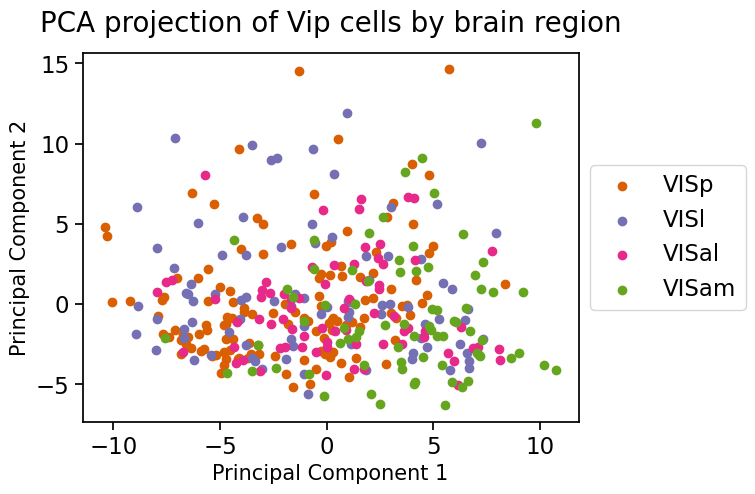

In [57]:
label2 = structure_ids_array
#Getting unique labels
structure_labels = ['VISp','VISl', 'VISal', 'VISam']
 
u_labels = np.unique(label2)
 
#plotting the results:
hues = sns.color_palette("Dark2")
 
for i in u_labels:
    plt.scatter(df_kmeans[label2 == i , 0] , df_kmeans[label2 == i , 1] , label = i, color = hues[i])
plt.legend(structure_labels,loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('PCA projection of Vip cells by brain region', fontsize = 20, pad = 15)

plt.savefig(genotype_image_path+'PCA_by_targetedstructure', format = "svg")

plt.show()


## Plot activity by cluster

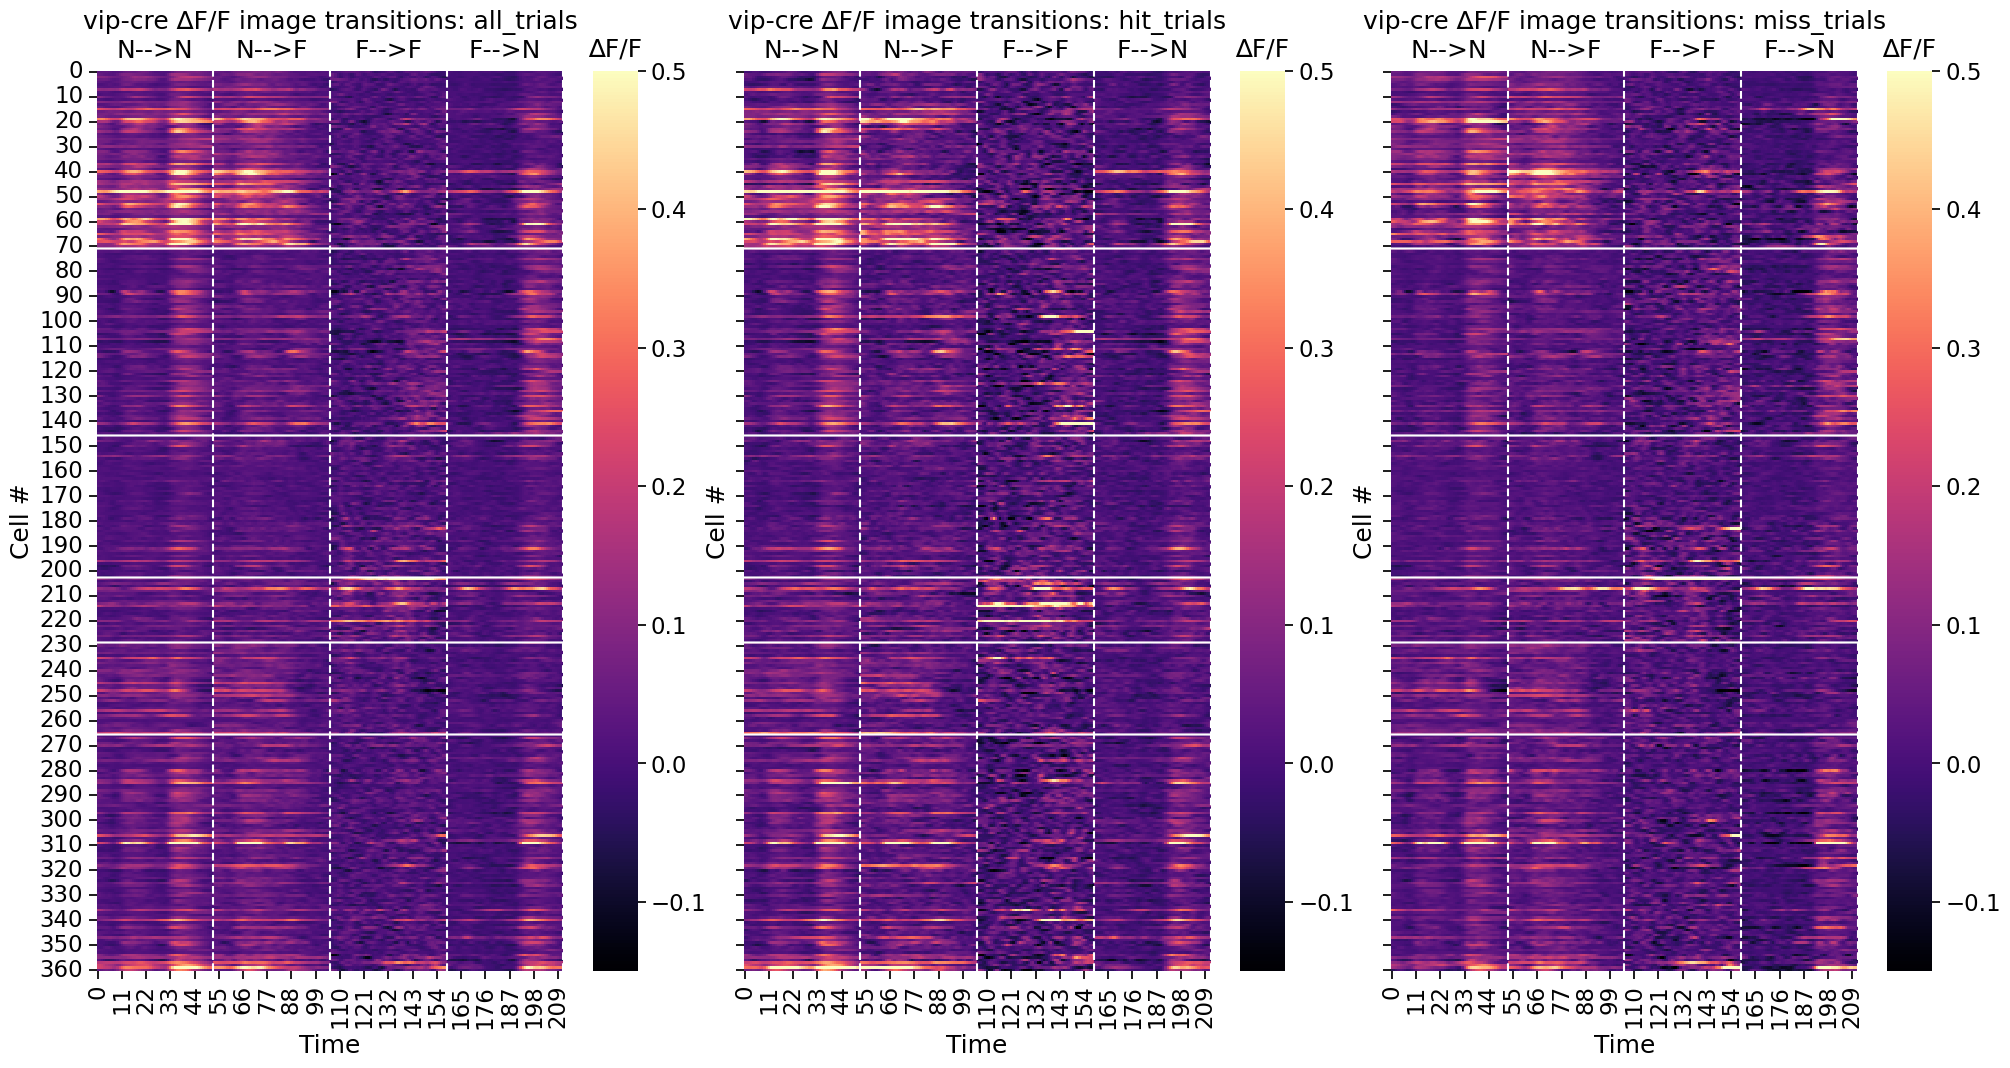

In [58]:
fig, axs = plt.subplots(1,3, sharey=True,
                        squeeze=False, #makes sure a 2D array of axs is always returned even if only 1 row/column
                        figsize = (20, 10), #have fig-size depend on number of companys/metrics
                        )
fig.tight_layout()

#dff_flat_list = []
plot_columns = ['dff_all', 'dff_hit', 'dff_miss']

for n, dff_list in enumerate(plot_columns):
    dff_array = np.array(sorted_clustered_df[dff_list].tolist())
    
    dff_flat = dff_array.reshape(len(curr_df.cell_specimen_id.unique()),-1)
    
    # Determine the positions where the kmeans_labels change
    label_changes = np.where(np.diff(sorted_clustered_df['kmeans_labels']))[0] + 1

    
    name_list = ['N-->N', 'N-->F', 'F-->F', 'F-->N']
    if n==2:
        sp = sns.heatmap(dff_flat,cmap='magma', ax=axs[0,n], vmin=-0.15, vmax=0.5)
    else:
        sp = sns.heatmap(dff_flat,cmap='magma', 
                         #cbar=False, 
                         ax=axs[0,n], vmin=-0.15, vmax=0.5)
    
    # sp = sns.heatmap(dff_flat,cmap='magma', ax=axs[0][n], vmin=-0.15, vmax=0.8)

    cbar = plt.gcf().axes[-1] 
    cbar.set_title('∆F/F', pad=10)  # Horizontal label
    #cbar.ax.yaxis.set_label_position('left')  # Position the label above the colorbar
    
    line_offset = 0
    for i in range(4):
        timepts = dff_array.shape[-1]
        sp.axvline(timepts*(i+1), color='w', linestyle='--')
        sp.text(timepts*(i+1)-timepts/2, -5, name_list[i], horizontalalignment='center')
        

        #temp_df = vip_stacked_dict[mouse_id_list[i]]
        #cell_ct = len(temp_df.cell_specimen_id.unique())
        #sp.axhline(cell_ct + line_offset, color='w', linewidth=1)
        #line_offset = line_offset + cell_ct
        
        for change in label_changes:
            sp.axhline(y=change, color='white', linewidth=1)

    # line_offset = 0
    # for mouse_id in mouse_id_list:
    #     temp_df = vip_stacked_dict[mouse_id]
    #     cell_ct = len(temp_df.cell_specimen_id.unique())
    #     plt.axhline(cell_ct + line_offset, color='w', linestyle='--', linewidth=1)
    #     line_offset = line_offset + cell_ct

    
    sp.set_title(f'{end_folder} ∆F/F image transitions: ' + groups_types_list[n], pad=30)
    sp.set_ylabel('Cell #');
    sp.set_xlabel('Time');
    
   # dff_flat_list += [dff_flat]

# Save as SVG

#plt.savefig(image_path+'dff_heatmap_'+curr_name_svg, format="svg")

plt.savefig(genotype_image_path+'sorted_dff_heatmap', format = "svg")
plt.show()

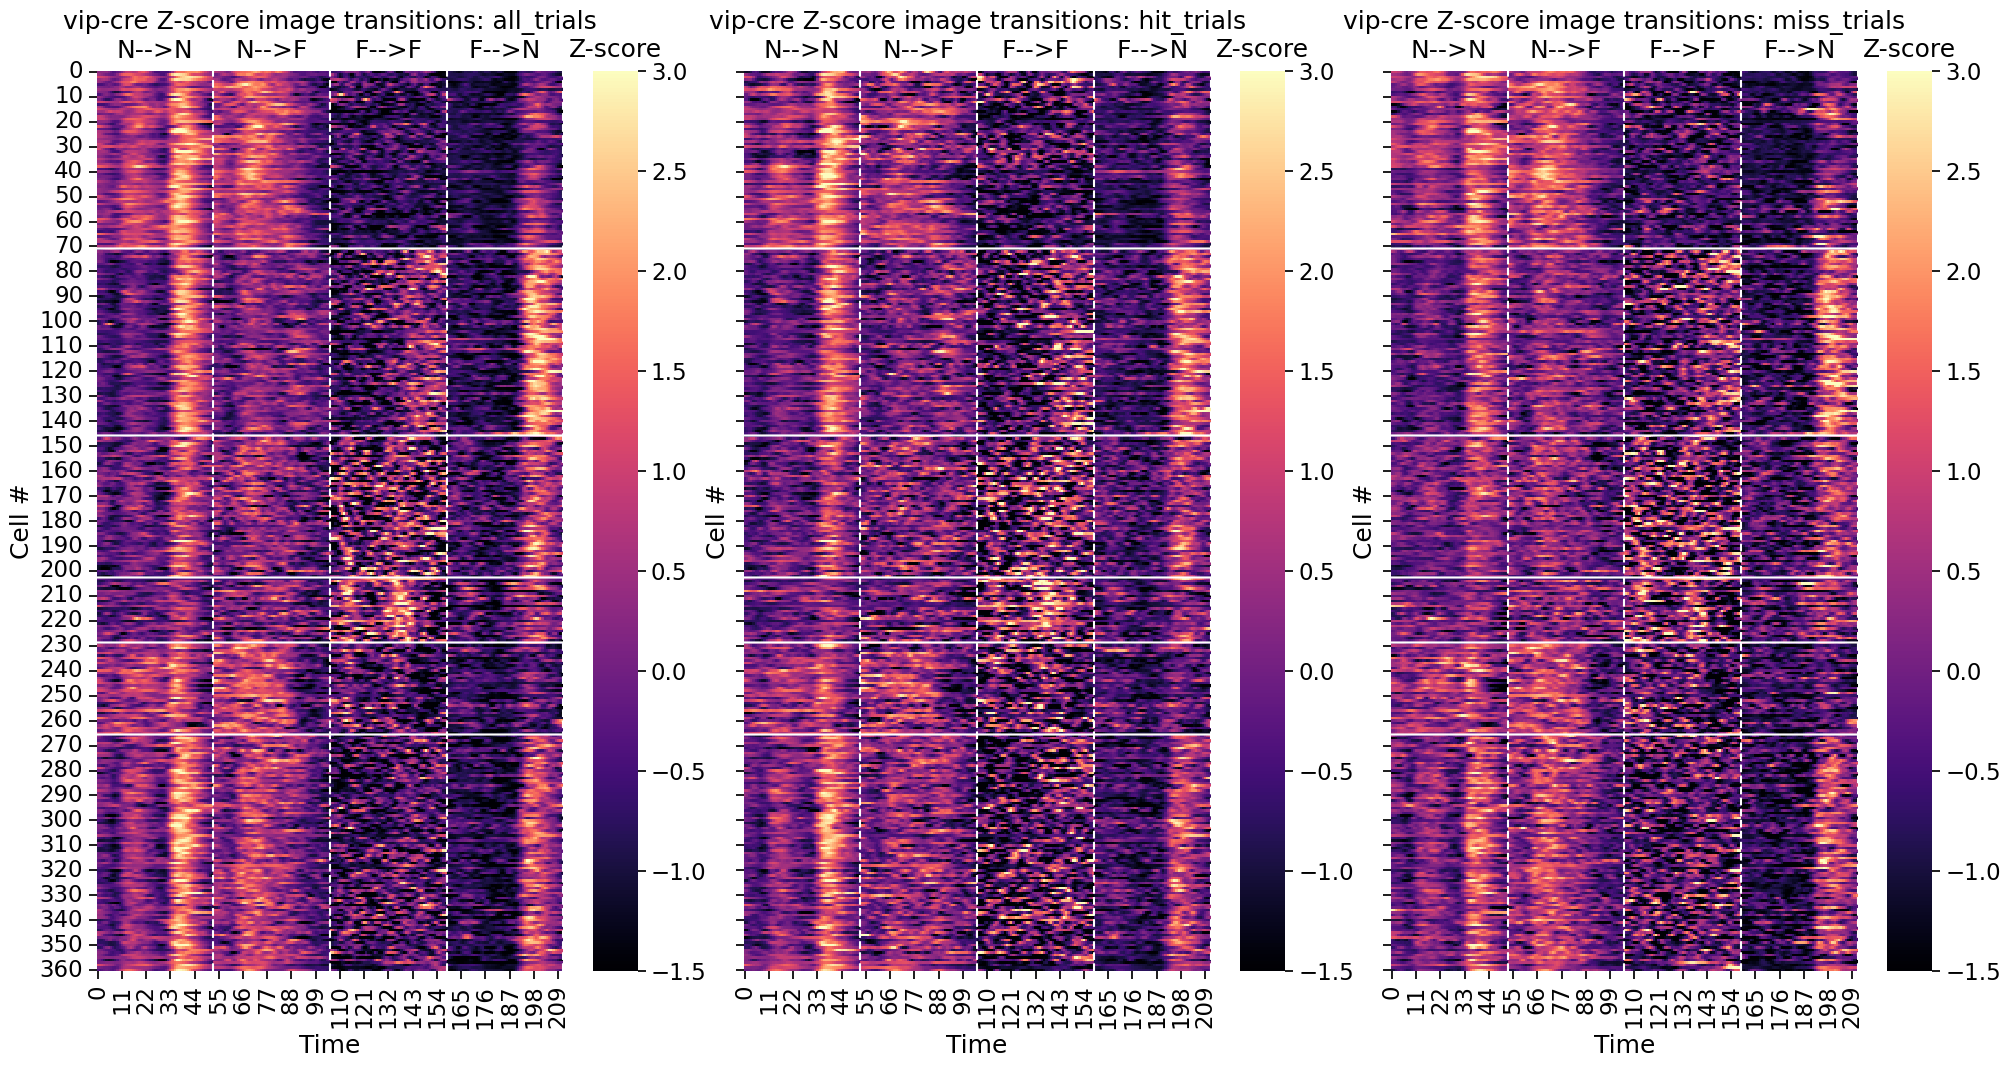

In [59]:
fig, axs = plt.subplots(1,3, sharey=True,
                        squeeze=False, #makes sure a 2D array of axs is always returned even if only 1 row/column
                        figsize = (20, 10), #have fig-size depend on number of companys/metrics
                        )
fig.tight_layout()

#dff_flat_list = []
plot_columns = ['z_all', 'z_hit', 'z_miss']

for n, dff_list in enumerate(plot_columns):
    dff_flat = np.array(sorted_clustered_df[dff_list].tolist())
    
    #dff_flat = dff_array.reshape(len(curr_df.cell_specimen_id.unique()),-1)
    
    # Determine the positions where the kmeans_labels change
    label_changes = np.where(np.diff(sorted_clustered_df['kmeans_labels']))[0] + 1

    
    name_list = ['N-->N', 'N-->F', 'F-->F', 'F-->N']
    if n==2:
        sp = sns.heatmap(dff_flat,cmap='magma', ax=axs[0,n], vmin=-1.5, vmax=3)
    else:
        sp = sns.heatmap(dff_flat,cmap='magma', 
                         #cbar=False, 
                         ax=axs[0,n], vmin=-1.5, vmax=3)
    
    # sp = sns.heatmap(dff_flat,cmap='magma', ax=axs[0][n], vmin=-0.15, vmax=0.8)

    cbar = plt.gcf().axes[-1] 
    cbar.set_title('Z-score', pad=10)  # Horizontal label
    #cbar.ax.yaxis.set_label_position('left')  # Position the label above the colorbar
    
    line_offset = 0
    for i in range(4):
        timepts = dff_array.shape[-1]
        sp.axvline(timepts*(i+1), color='w', linestyle='--')
        sp.text(timepts*(i+1)-timepts/2, -5, name_list[i], horizontalalignment='center')
        

        #temp_df = vip_stacked_dict[mouse_id_list[i]]
        #cell_ct = len(temp_df.cell_specimen_id.unique())
        #sp.axhline(cell_ct + line_offset, color='w', linewidth=1)
        #line_offset = line_offset + cell_ct
        
        for change in label_changes:
            sp.axhline(y=change, color='white', linewidth=1)

    # line_offset = 0
    # for mouse_id in mouse_id_list:
    #     temp_df = vip_stacked_dict[mouse_id]
    #     cell_ct = len(temp_df.cell_specimen_id.unique())
    #     plt.axhline(cell_ct + line_offset, color='w', linestyle='--', linewidth=1)
    #     line_offset = line_offset + cell_ct

    
    sp.set_title(f'{end_folder} Z-score image transitions: ' + groups_types_list[n], pad=30)
    sp.set_ylabel('Cell #');
    sp.set_xlabel('Time');
    
 #   dff_flat_list += [dff_flat]

# Save as SVG

plt.savefig(genotype_image_path+'sorted_zscore_heatmap', format = "svg")
plt.show()

## Plot cell distribution across clusters

In [61]:

sorted_clustered_df.groupby(['kmeans_labels', 'cell_specimen_id']).count().reset_index().groupby(['kmeans_labels']).count()[['cell_specimen_id']]


cell_specimen_id
kmeans_labels                  
0                            71
1                            75
2                            57
3                            26
4                            37
5                            95

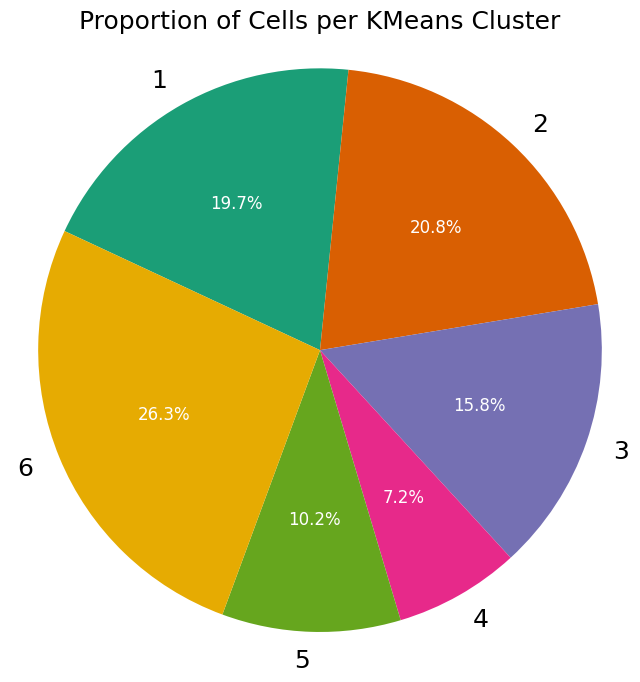

In [91]:
# Calculate the number of cells per KMeans cluster
cell_counts = sorted_clustered_df.groupby(['kmeans_labels', 'cell_specimen_id']).count().reset_index().groupby(['kmeans_labels']).count()[['cell_specimen_id']]

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(cell_counts['cell_specimen_id'], labels=cell_counts.index+1, autopct='%1.1f%%', startangle=155, colors=sns.color_palette("Dark2"),
                                  textprops={'fontsize': 18, 'color': 'black'},  # Font size and color for the labels
                                  counterclock=False
                                 )

# Customize the font size and color of the percentages
for autotext in autotexts:
    autotext.set_fontsize(12)  # Set the font size of the percentages
    autotext.set_color('white')  # Set the color of the percentages

# Add a title
ax.set_title('Proportion of Cells per KMeans Cluster', pad=10)

# Equal aspect ratio ensures that the pie is drawn as a circle.
ax.axis('equal')  

# Display the plot
plt.show()